<a href="https://colab.research.google.com/github/SriRamK345/Sales_dataset/blob/main/Sales_Forecasting_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Features**

Contains additional data related to the store, department, and regional activity for the given dates.
-	Store - the store number
-	Date - the week
-	Temperature - average temperature in the region
-	Fuel_Price - cost of fuel in the region
-	MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
-	CPI - the consumer price index
-	Unemployment - the unemployment rate
-	IsHoliday - whether the week is a special holiday week
- The data consists of three sheets:
    - Stores
    - Features
    - Sales



In [2]:
# Data cleaning
import pandas as pd
import numpy as np
# Visualization / EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical analysis
from scipy import stats
# remove warnings
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
# Machine Learning
from sklearn.ensemble import RandomForestRegressor
# zscore to find outliers
from scipy.stats import zscore

### Loading datasets

In [3]:
#Loading Store Dataset
df_store = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/stores_data_set.csv")
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
# Loading Sales Dataset
df_sales = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/sales_data_set.csv")
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
# Loading Features Dataset
df_feature = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/Features_data_set.csv")
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Analysing Datasets

In [6]:
df_store.shape

(45, 3)

In [7]:
df_store.isnull().sum()

,0
Store,0
Type,0
Size,0


In [8]:
df_sales.shape

(421570, 5)

In [9]:
df_sales.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [10]:
df_feature.shape

(8190, 12)

In [11]:
df_feature.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


### Combining Datasets

In [12]:
merged_df = pd.merge(df_store, df_sales, on='Store', how='outer')
merged_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [13]:
merged_df.shape

(421570, 7)

In [14]:
merged_df.isnull().sum()

,0
Store,0
Type,0
Size,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [15]:
df = pd.merge(merged_df, df_feature, on=['Store','Date'], how='outer')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [16]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (423325, 17)


In [17]:
# Checking info of data as data types and rows and cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

## Checking Null Values

In [18]:
df.isnull().sum()

,0
Store,0
Type,1755
Size,1755
Dept,1755
Date,0
Weekly_Sales,1755
IsHoliday_x,1755
Temperature,0
Fuel_Price,0
MarkDown1,270892


In [19]:
df.duplicated().sum()

0

In [20]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

### Preparation for Exploratory Data Analysis(EDA)

In [21]:
df.IsHoliday_x.value_counts()

,count
IsHoliday_x,
False,391909
True,29661


In [22]:
df.IsHoliday_y.value_counts()

,count
IsHoliday_y,
False,393529
True,29796


In [23]:
df= df.drop(columns=['IsHoliday_x'])

# Rename column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [24]:
# check negative weekly_sales count
df[df['Weekly_Sales']<=0]

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
188,1,A,151315.0,47.0,19/02/2010,-863.00,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
406,1,A,151315.0,47.0,12/03/2010,-698.00,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
2549,1,A,151315.0,47.0,08/10/2010,-58.00,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False
3632,1,A,151315.0,54.0,21/01/2011,-50.00,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False
4132,1,A,151315.0,47.0,11/03/2011,0.00,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,B,118221.0,49.0,25/05/2012,-4.97,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,False
420403,45,B,118221.0,49.0,29/06/2012,-34.00,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,False
420736,45,B,118221.0,49.0,03/08/2012,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False
421007,45,B,118221.0,54.0,31/08/2012,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False


In [25]:
len(df[df['Weekly_Sales']<=0])

1358

In [26]:
# negative weekly_sales values converting to null value

df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
423320,45,NaN,NaN,NaN,28/06/2013,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
423324,45,NaN,NaN,NaN,26/07/2013,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [27]:
len(df.MarkDown1.unique())

4024

### Missing or Null values

In [28]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Store,0
Type,1755
Size,1755
Dept,1755
Date,0
Weekly_Sales,3113
Temperature,0
Fuel_Price,0
MarkDown1,270892
MarkDown2,310793


### Unique Values

In [29]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Store,45
Type,3
Size,40
Dept,81
Date,182
Weekly_Sales,358785
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715


In [30]:
df["Dept"].value_counts()

,count
Dept,
1.0,6435
16.0,6435
92.0,6435
38.0,6435
40.0,6435
...,...
78.0,235
77.0,150
65.0,143


### Separating columns (Numeric or Categorical)

In [31]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [32]:
#
numeric_columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3",  "MarkDown4", "MarkDown5", "CPI", "Unemployment"]
category_columns = ["Store",  "Type", "Size","IsHoliday", "Dept"]

In [33]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Temperature,423325.0,60.067140,18.452599,-7.290,46.670000,62.070000,74.260000,101.950000
Fuel_Price,423325.0,3.361933,0.458038,2.472,2.935000,3.452000,3.738000,4.468000
MarkDown1,152433.0,7246.604247,8319.906707,-2781.450,2230.800000,5336.520000,9210.900000,103184.980000
MarkDown2,112532.0,3337.597289,9461.265420,-265.760,42.000000,194.670000,1943.200000,104519.540000
MarkDown3,138658.0,1449.098932,9674.705234,-179.260,5.140000,24.830000,104.500000,149483.310000
MarkDown4,136466.0,3382.019834,6306.728468,0.220,500.910000,1465.540000,3592.000000,67474.850000
MarkDown5,153187.0,4618.743783,6258.233496,-185.170,1863.720000,3340.020000,5535.130000,771448.100000
CPI,422740.0,171.218863,39.167088,126.064,132.022667,182.350989,212.512605,228.976456
Unemployment,422740.0,7.957296,1.863433,3.684,6.891000,7.866000,8.567000,14.313000


In [34]:
df.shape

(423325, 16)

In [35]:
df.IsHoliday.value_counts()

,count
IsHoliday,
False,393529
True,29796


In [36]:
# make Date feature into --> Day,Month,Year new features
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,A,151315.0,1.0,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,2010
1,1,A,151315.0,2.0,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,2010
2,1,A,151315.0,3.0,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,2010
3,1,A,151315.0,4.0,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,2010
4,1,A,151315.0,5.0,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,2010


In [37]:
df.tail(2)

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
423323,45,NaN,NaN,NaN,2013-07-19,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,19,7,2013
423324,45,NaN,NaN,NaN,2013-07-26,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,26,7,2013


In [38]:
print(df['Date'].min(),'initial date')
print(df['Date'].max(),'final date')

2010-02-05 00:00:00 initial date
2013-07-26 00:00:00 final date


In [39]:
print("Markdown1 =", df.MarkDown1.isnull().sum()/421570)
print("Markdown2 =", df.MarkDown2.isnull().sum()/421570)
print("Markdown3 =", df.MarkDown3.isnull().sum()/421570)
print("Markdown4 =", df.MarkDown4.isnull().sum()/421570)
print("Markdown5 =", df.MarkDown5.isnull().sum()/421570)

Markdown1 = 0.6425789311383637
Markdown2 = 0.737227506701141
Markdown3 = 0.6752544061484451
Markdown4 = 0.6804540171264558
Markdown5 = 0.6407903788220224


### Exploratory Data Analysis(EDA)

In [40]:
# Dropping null values
# Markdown coluns have more than 60% of null values
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales','CPI','Unemployment'], inplace=True)

In [41]:
def plot(df, column):

    sns.set_style("whitegrid") # Setting the style for seaborn

    plt.figure(figsize=(20, 5)) # Creating the figure with a specific size

    # Creating the first subplot for the box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}', fontsize=16,color ="red")
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Value', fontsize=14, color = 'darkblue')

    # Creating the second subplot for the distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, bins=50, kde = True)
    plt.title(f'Distribution Plot for {column}', fontsize=16, color = 'red')
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Frequency', fontsize=14, color = 'darkblue')

    # Adjusting the layout
    plt.tight_layout()

    # Displaying the plots
    plt.show()

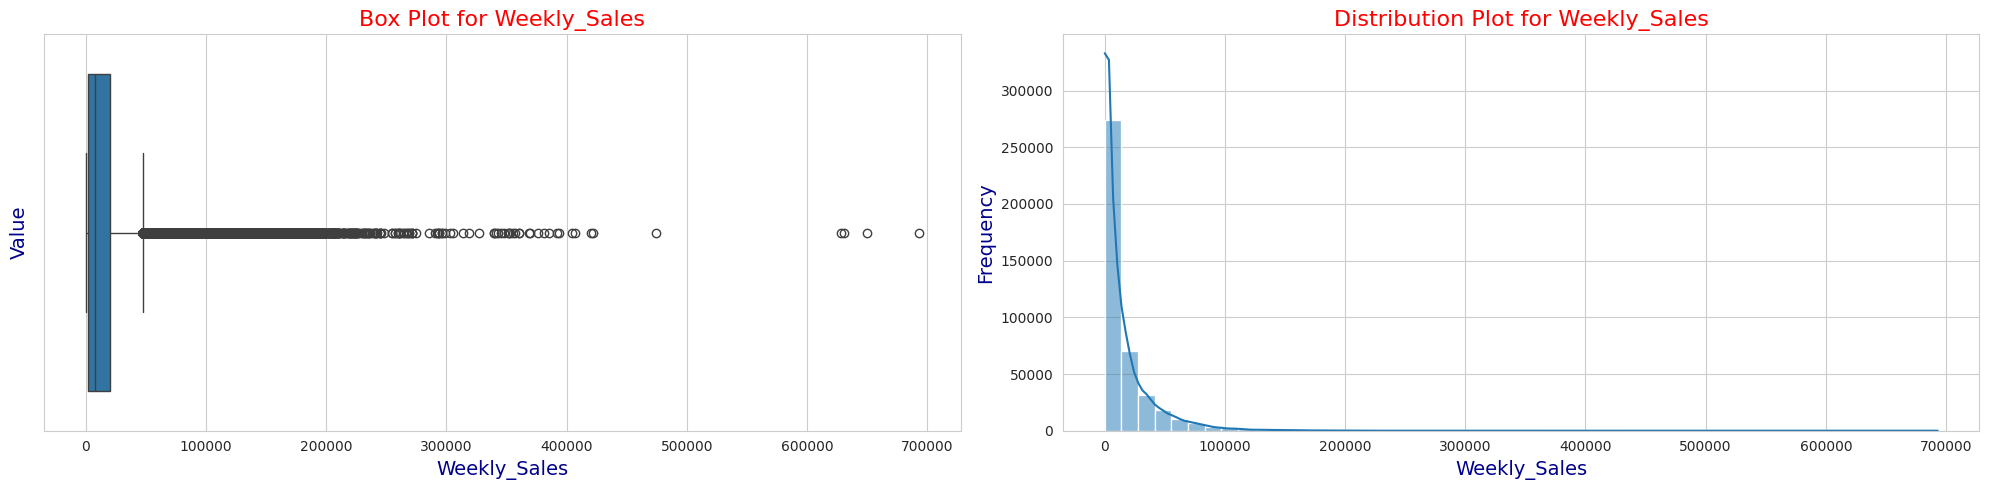

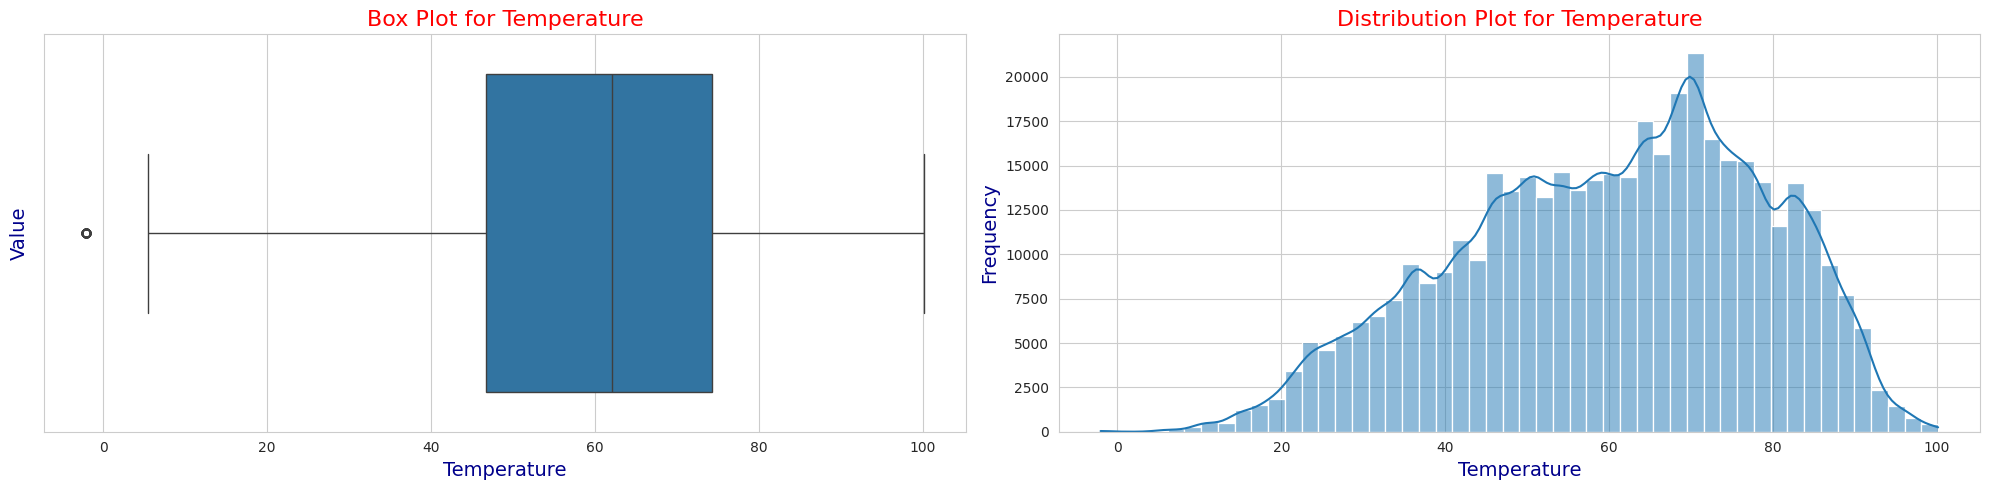

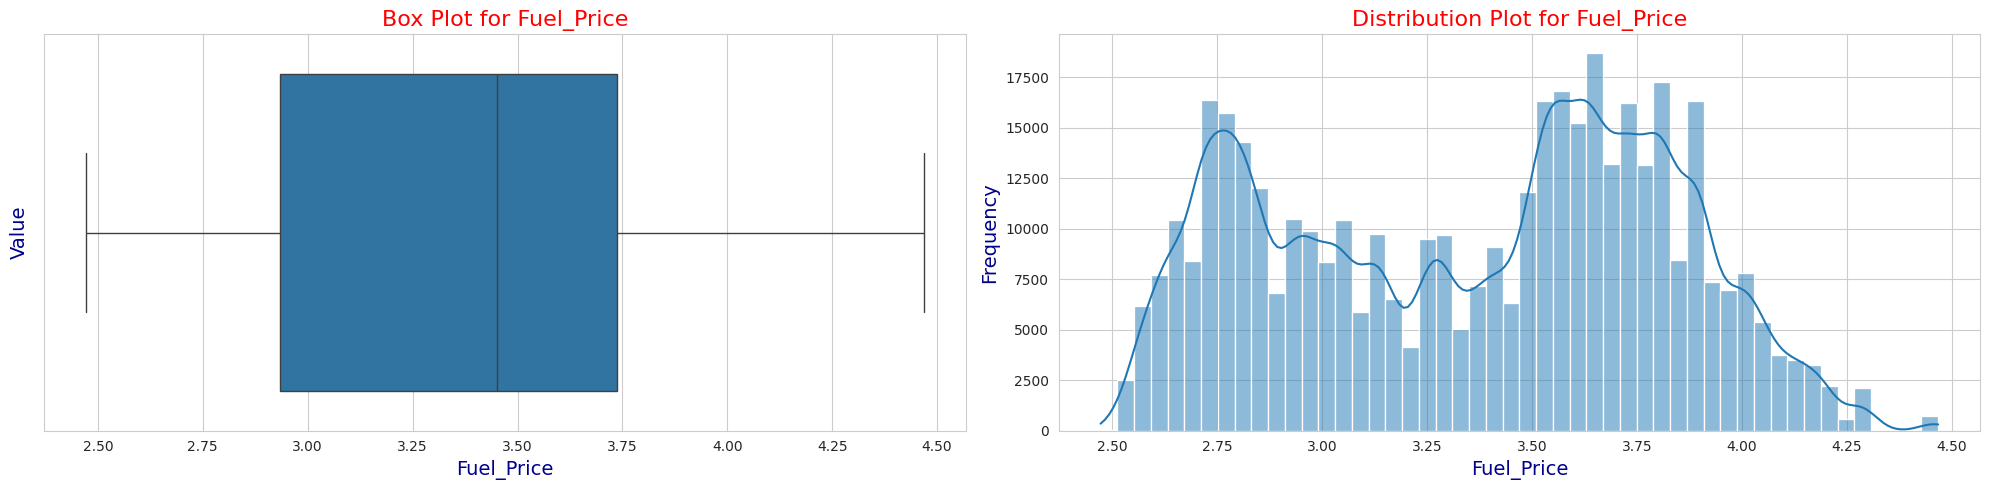

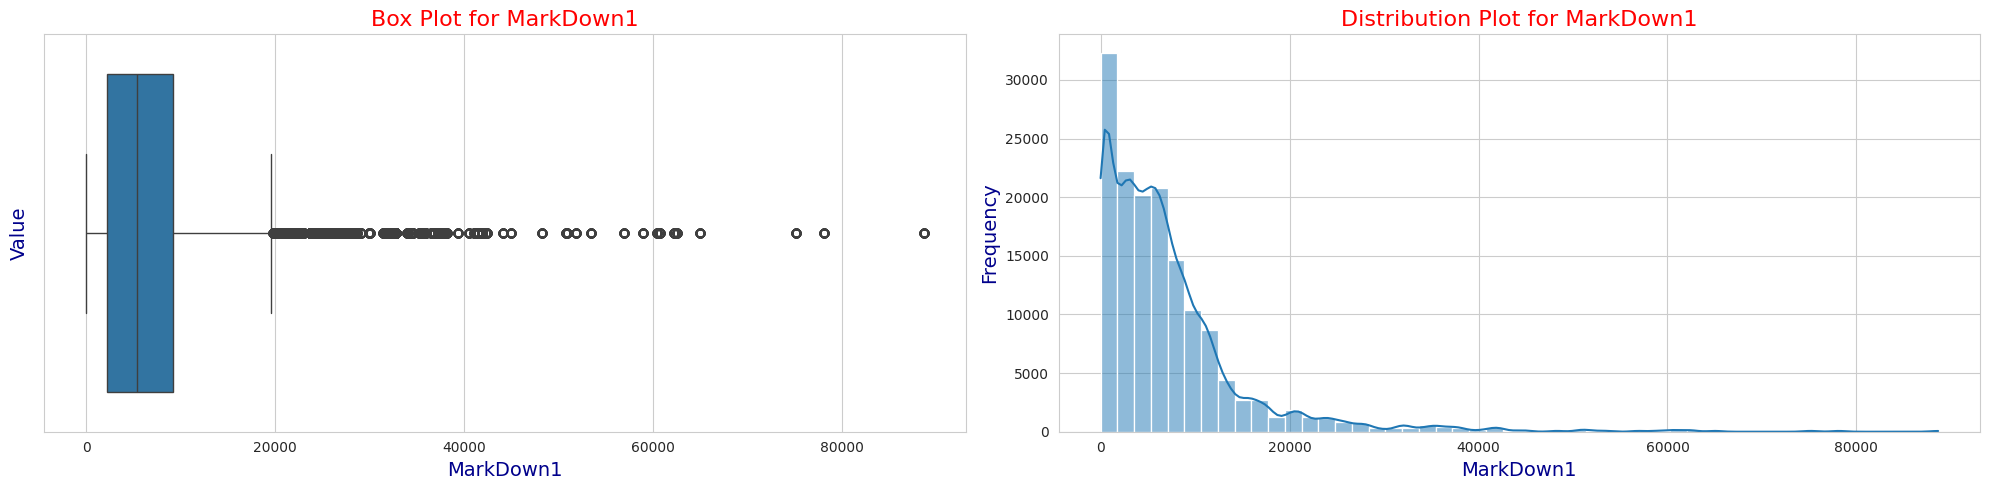

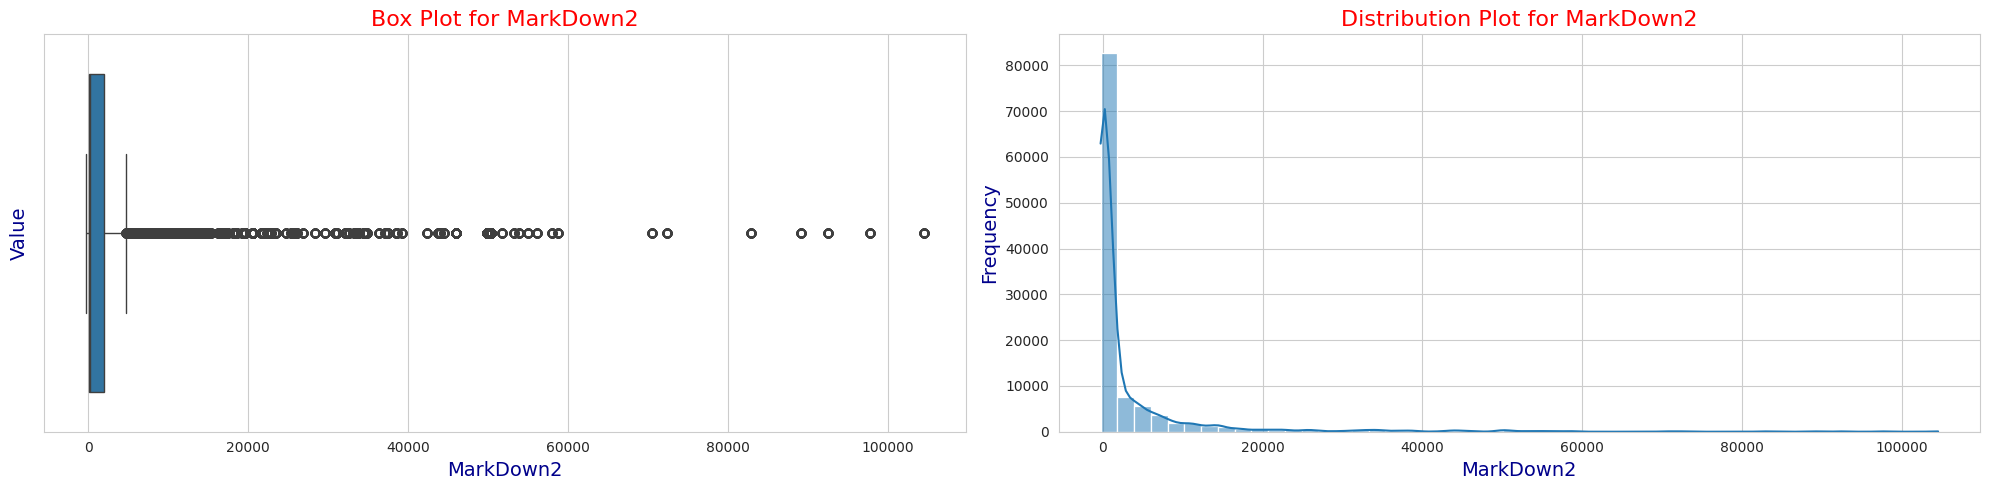

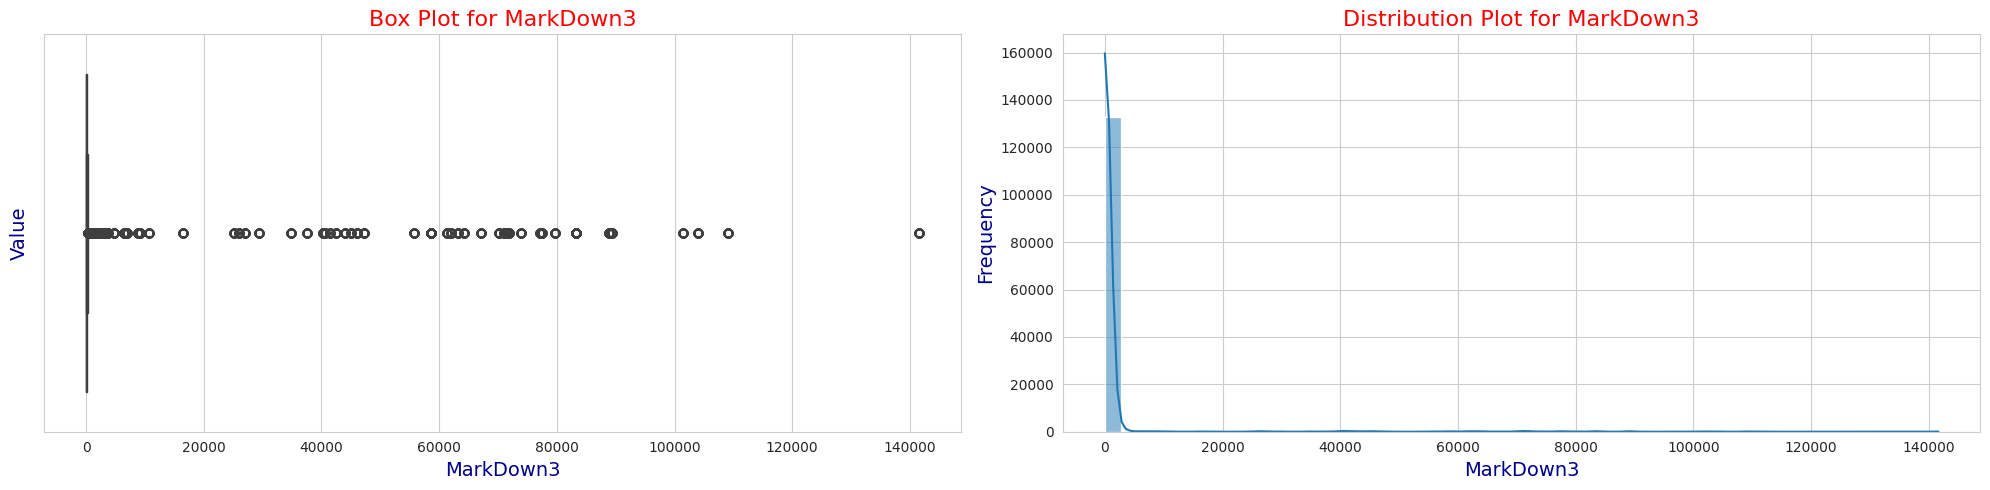

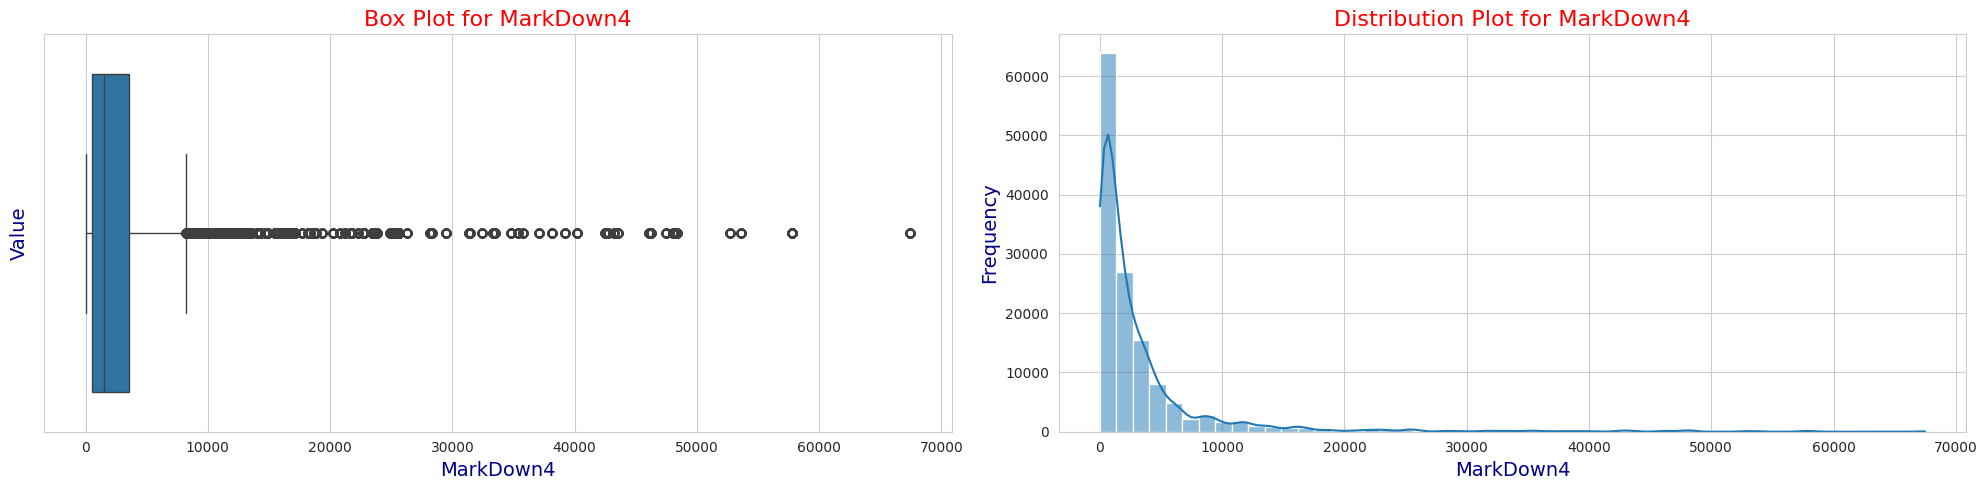

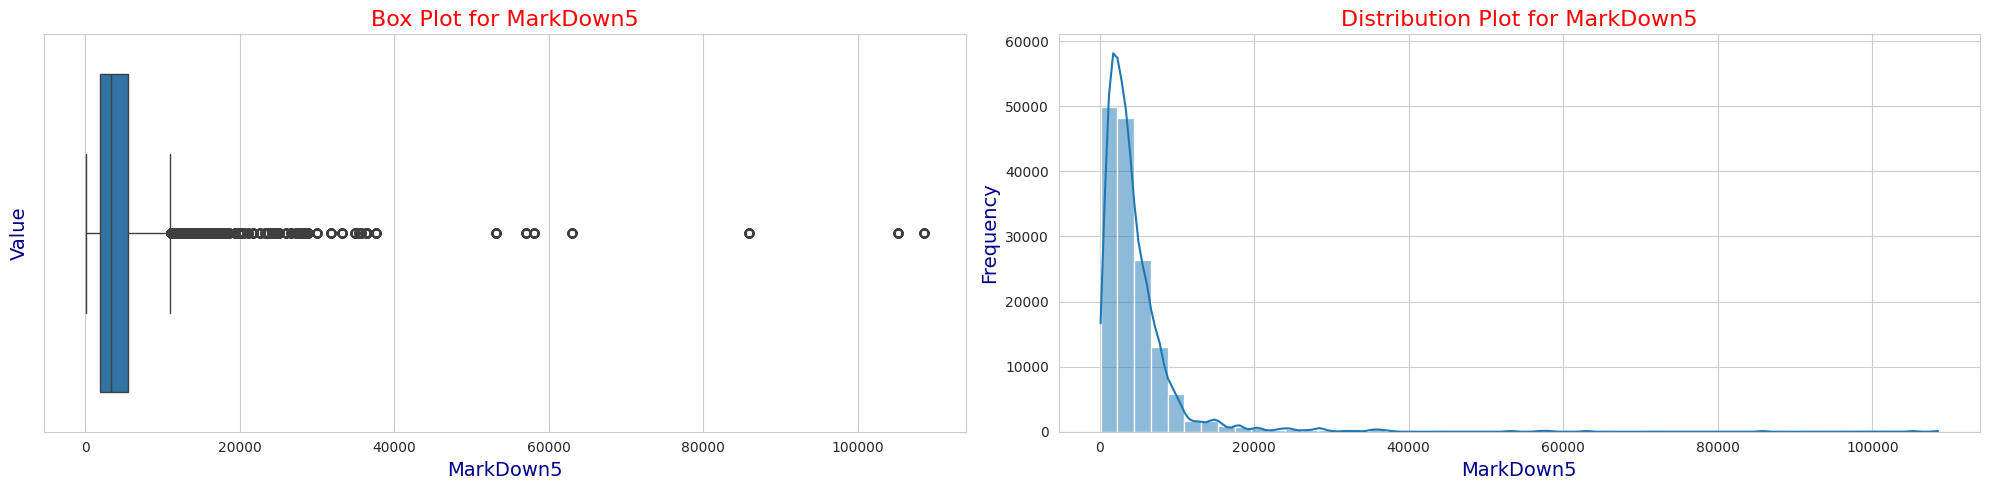

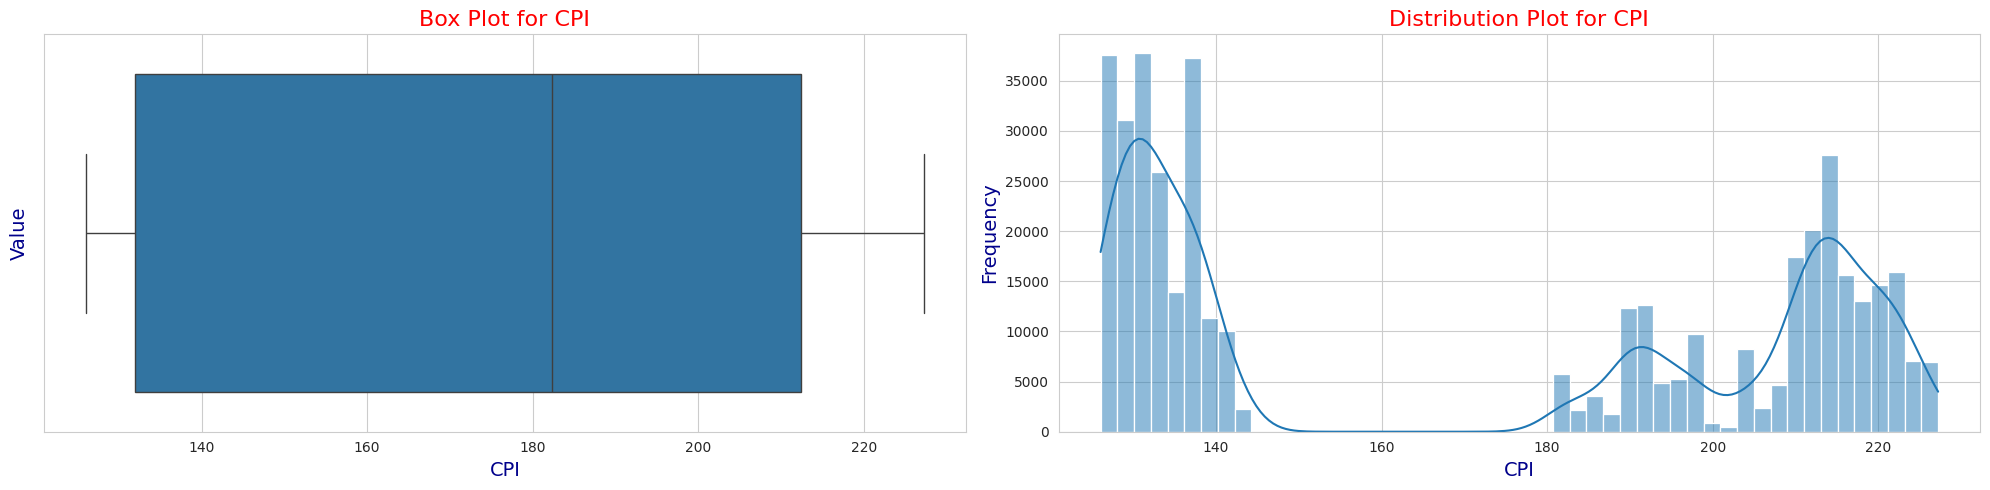

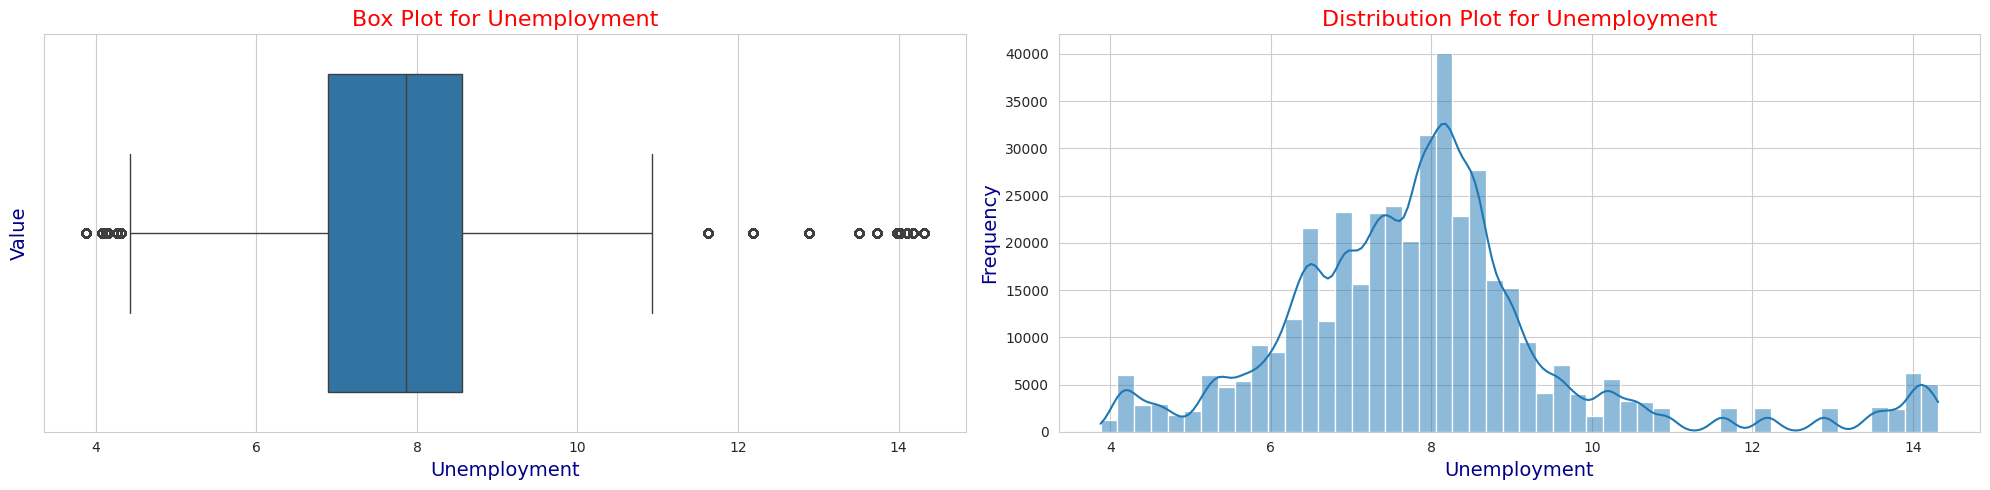

In [42]:
for i in numeric_columns:
   plot(df, i)

### Analyzing Categorical Variables

In [43]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

In [44]:
# encoding for catagorical features into numerical
df['IsHoliday'] = df['IsHoliday'].map({True:1, False:0})
df['Type'] = df['Type'].map({'A':1, 'B':2, 'C':3})

In [45]:
df[category_columns].corr()
# there is a corelation between Store and its Type

,Store,Type,Size,IsHoliday,Dept
Store,1.000000,0.226352,-0.182763,-0.000522,0.024258
Type,0.226352,1.000000,-0.811541,-0.001000,0.003157
Size,-0.182763,-0.811541,1.000000,0.000797,-0.002491
IsHoliday,-0.000522,-0.001000,0.000797,1.000000,0.000663
Dept,0.024258,0.003157,-0.002491,0.000663,1.000000


In [46]:
len(df["Size"].value_counts())

40

In [47]:
len(df["Dept"].value_counts())

81

### Uni-variate Analysis

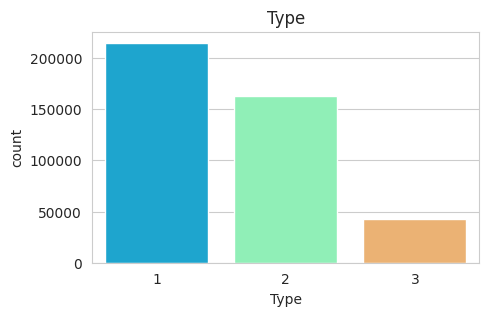

In [48]:
plt.figure(figsize = (5,3))
sns.countplot(x="Type", data = df, palette = "rainbow")
plt.title("Type")
plt.show()

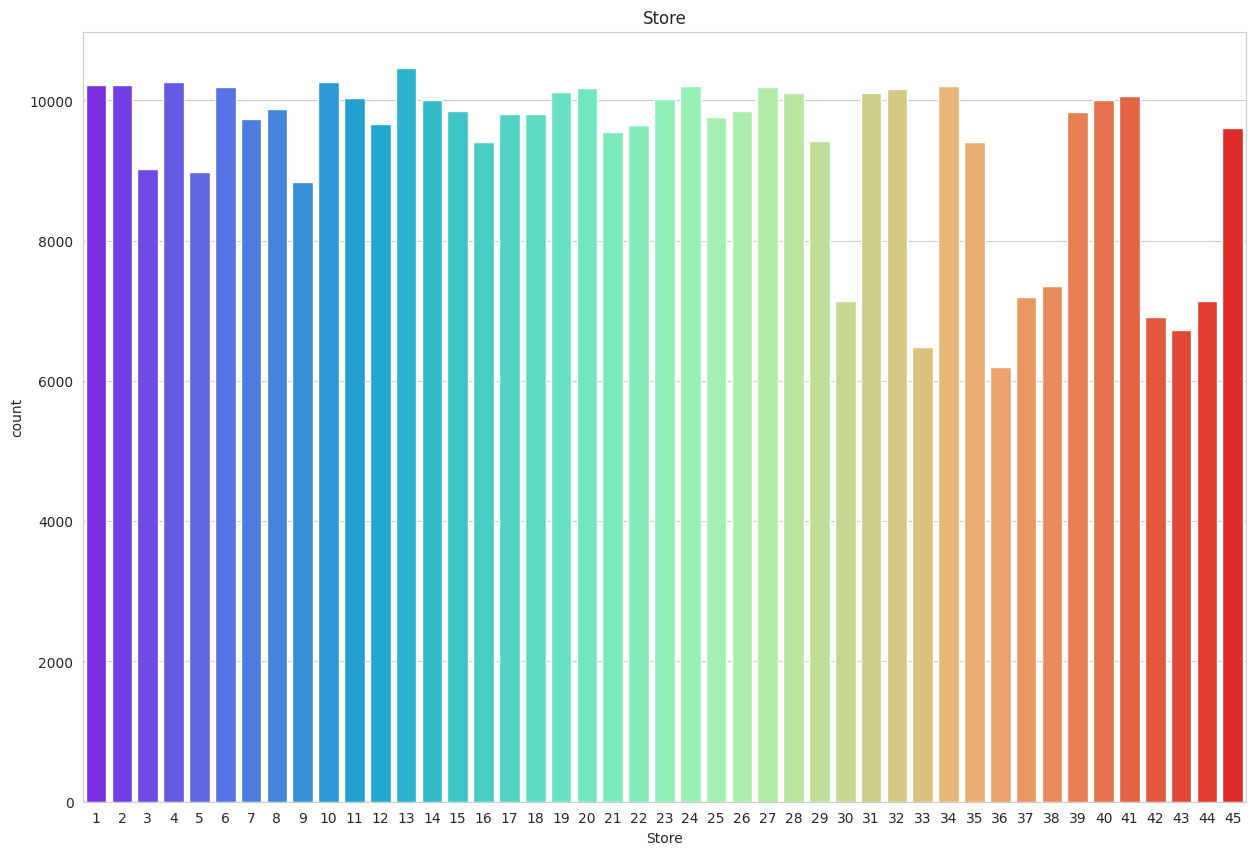

In [49]:
plt.figure(figsize = (15,10))
sns.countplot(x="Store", data = df, palette = "rainbow")
plt.title("Store")
plt.show()

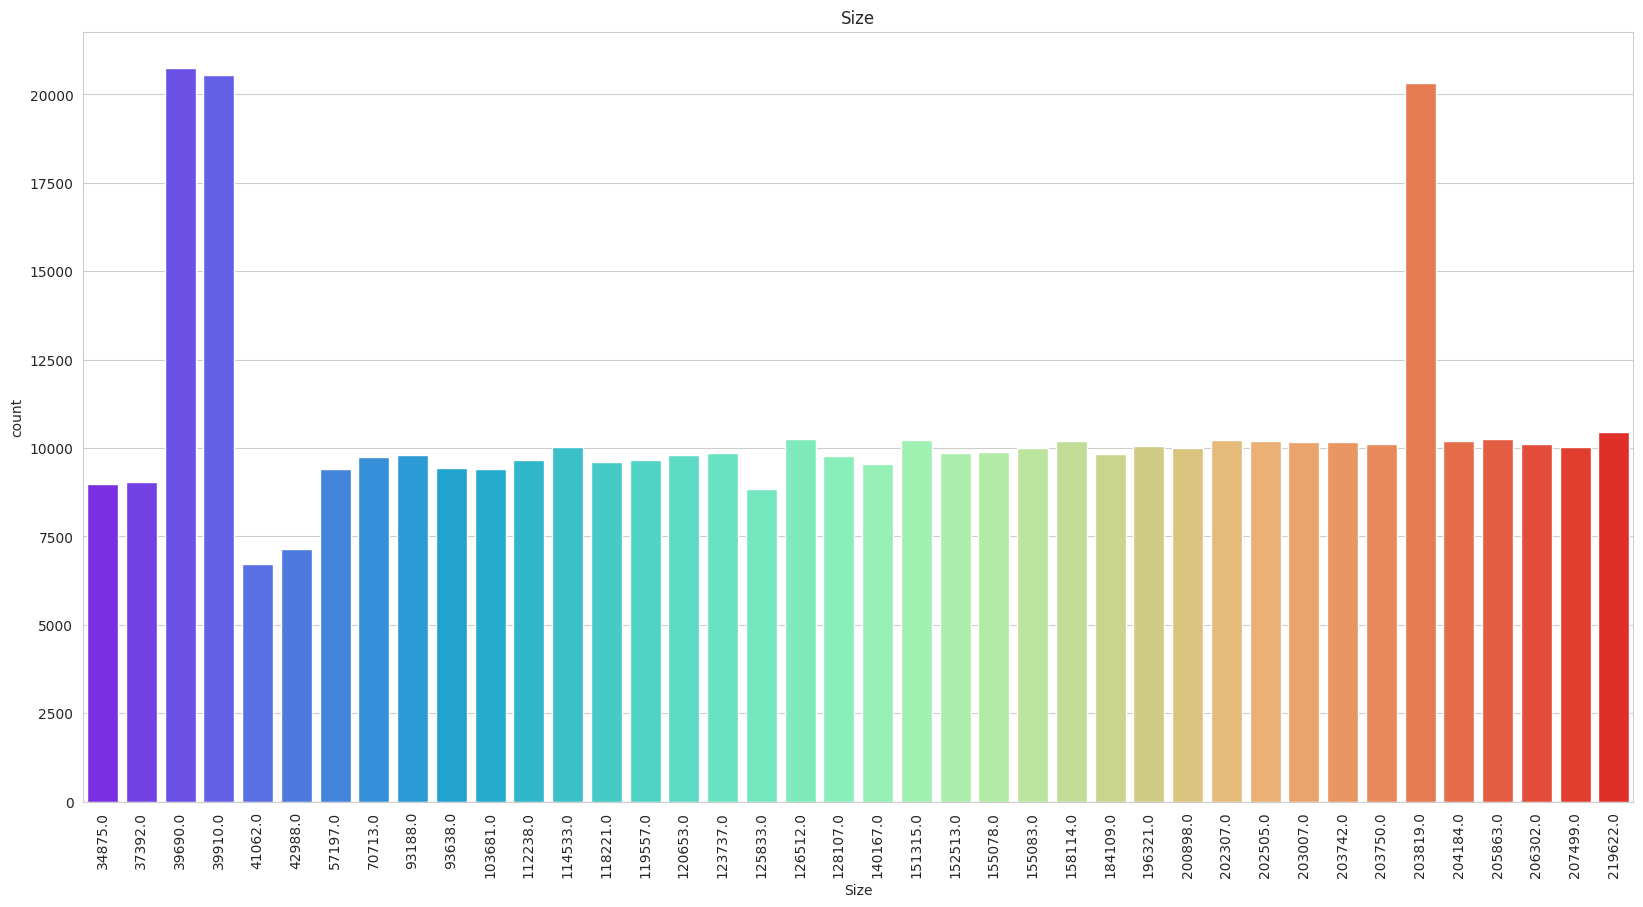

In [50]:
plt.figure(figsize = (20,10))
sns.countplot(x="Size", data = df, palette = "rainbow",)
plt.title("Size")
plt.xticks(rotation = 90)
plt.show()

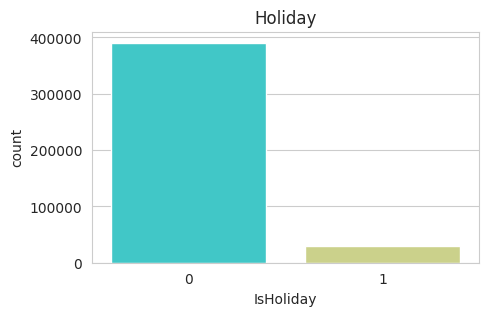

In [51]:
plt.figure(figsize = (5,3))
sns.countplot(x="IsHoliday", data = df, palette = "rainbow")
plt.title("Holiday")
plt.show()

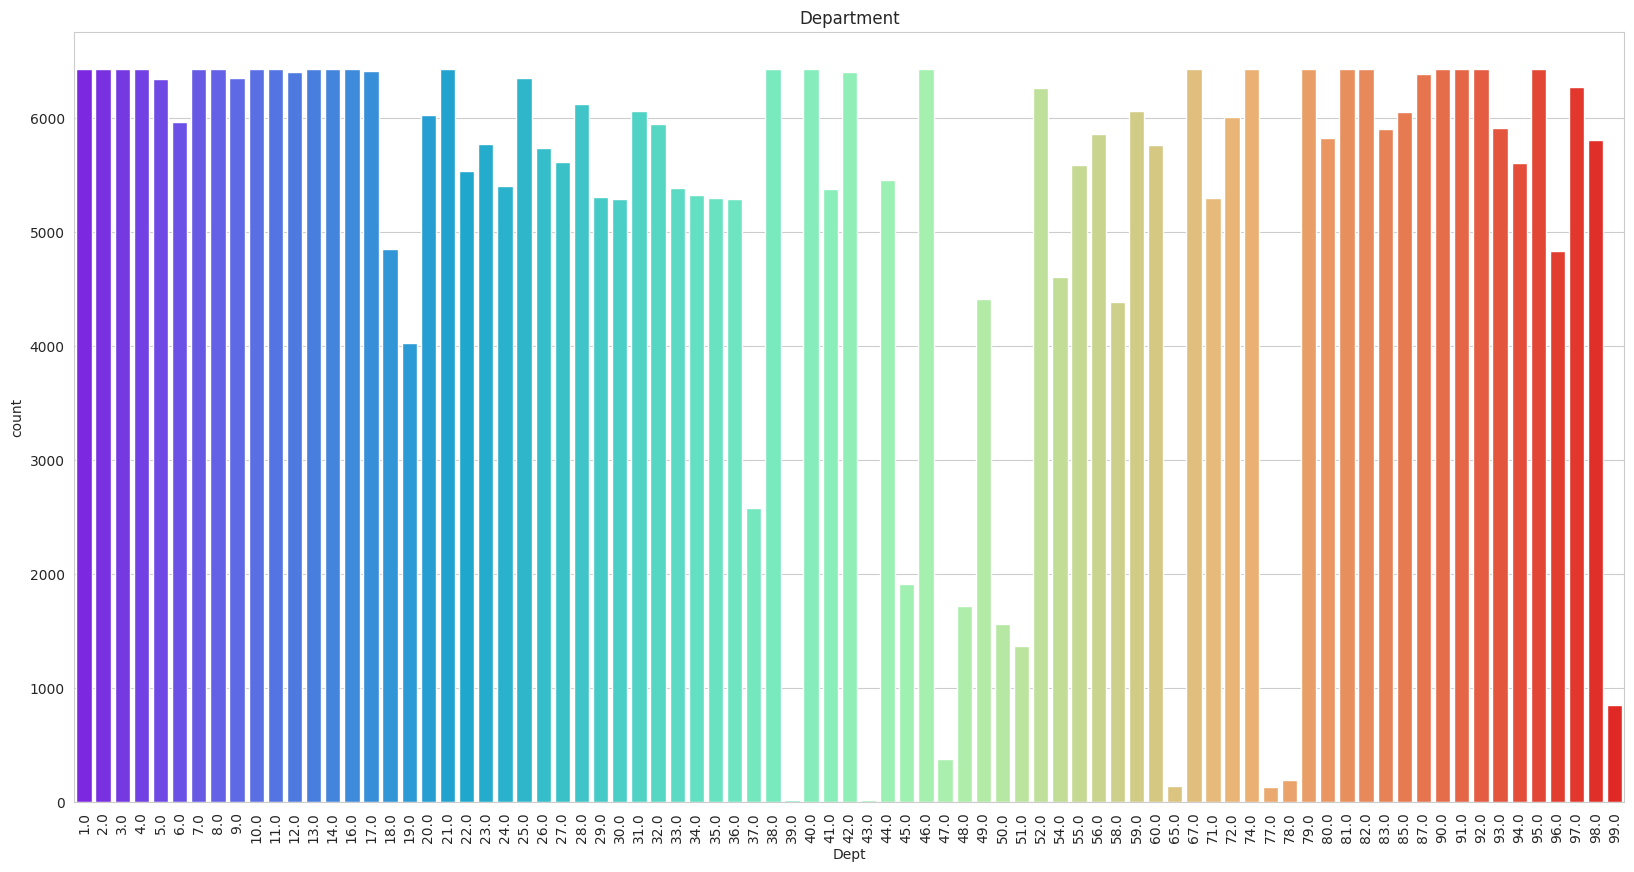

In [52]:
plt.figure(figsize = (20,10))
sns.countplot(x="Dept", data = df, palette = "rainbow")
plt.title("Department")
plt.xticks(rotation = 90)
plt.show()

### Bi-variate Analysis

In [53]:
numeric_columns

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [54]:
df[numeric_columns].corr()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Weekly_Sales,1.000000,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806
Temperature,-0.002339,1.000000,0.143700,-0.040498,-0.323891,-0.096843,-0.063955,-0.017616,0.182223,0.096768
Fuel_Price,0.000089,0.143700,1.000000,0.061302,-0.220680,-0.102146,-0.045033,-0.128017,-0.164199,-0.033915
MarkDown1,0.085325,-0.040498,0.061302,1.000000,0.024601,-0.108189,0.819175,0.160412,-0.055522,0.050103
MarkDown2,0.024565,-0.323891,-0.220680,0.024601,1.000000,-0.050146,-0.007582,-0.007410,-0.039782,0.020839
MarkDown3,0.060304,-0.096843,-0.102146,-0.108189,-0.050146,1.000000,-0.071148,-0.026475,-0.023820,0.012866
MarkDown4,0.045325,-0.063955,-0.045033,0.819175,-0.007582,-0.071148,1.000000,0.107895,-0.049693,0.024919
MarkDown5,0.090561,-0.017616,-0.128017,0.160412,-0.007410,-0.026475,0.107895,1.000000,0.060375,-0.003834
CPI,-0.021162,0.182223,-0.164199,-0.055522,-0.039782,-0.023820,-0.049693,0.060375,1.000000,-0.299887
Unemployment,-0.025806,0.096768,-0.033915,0.050103,0.020839,0.012866,0.024919,-0.003834,-0.299887,1.000000


In [55]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df['Markdown'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Markdown
0,1,1,151315.0,1.0,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
1,1,1,151315.0,2.0,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
2,1,1,151315.0,3.0,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
3,1,1,151315.0,4.0,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
4,1,1,151315.0,5.0,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0


In [56]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df.groupby('Markdown')['Weekly_Sales'].mean()

,Weekly_Sales
Markdown,
0,15922.137810
1,16231.116041


In [57]:
df.drop("Date", axis=1, inplace=True)

### Correlation Analysis

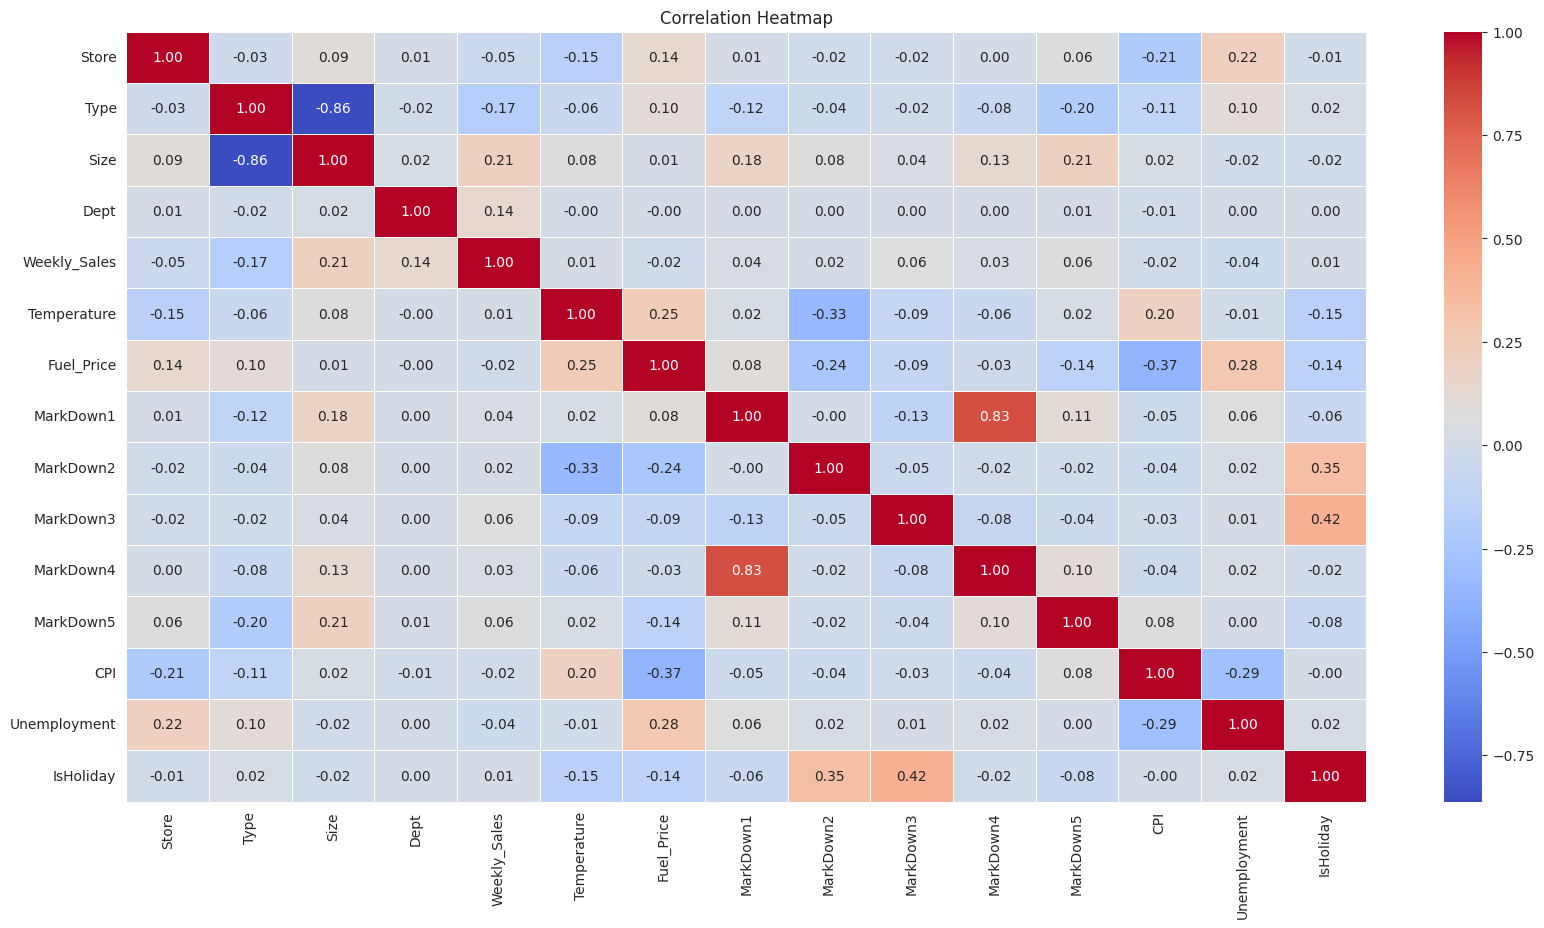

In [232]:
# Calculate the correlation matrix
df_corr = df.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- In heatmap shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
- Other features are weak correlation with weekly_sales.

### T-Test for Holiday vs. Non-Holiday Sales

In [58]:
from scipy.stats import ttest_ind

# Split the data
holiday_sales = df[df['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == False]['Weekly_Sales']

# Perform t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 8.325850913356877, P-Value: 8.397167565793022e-17


 **Interpretation:**
- **T-Statistic:** The t-statistic of 8.33 indicates that the difference in mean weekly sales between holidays and non-holidays is quite large in comparison to the variability of the data.
- **P-Value:** The p-value is extremely small (\(8.40 \times 10^{-17}\)), which is much lower than the common significance level of 0.05.

Given the very low p-value, we reject the null hypothesis. This means that there is a statistically significant difference in average weekly sales between holiday periods and non-holiday periods. Specifically, sales tend to be higher during holiday periods compared to non-holiday periods.

###  ANOVA for Store Types

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA
anova_model = ols('Weekly_Sales ~ C(Type)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)


                sum_sq        df            F  PR(>F)
C(Type)   7.705191e+12       2.0  7731.544816     0.0
Residual  2.093883e+14  420209.0          NaN     NaN


 **ANOVA Results:**
- **Sum of Squares (C(Type))**: \(7.71 \times 10^{12}\)
- **Degrees of Freedom (C(Type))**: 2
- **F-Statistic**: 7731.54
- **P-Value**: 0.0

 **Interpretation:**
- **Sum of Squares (C(Type))**: This value (around \(7.71 \times 10^{12}\)) represents the variance in `Weekly_Sales` that can be explained by the store type.
- **F-Statistic**: The F-statistic of 7731.54 is very large, indicating that the variation between the means of different store types is much larger than the variation within each store type.
- **P-Value**: The p-value is 0.0, which is far below the common significance level of 0.05.

Given the extremely low p-value, we reject the null hypothesis. This indicates that there is a statistically significant difference in mean `Weekly_Sales` across the different store types. **Store type has a significant impact on sales.**

In [234]:
df2 = df.copy()
df2.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Markdown
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,0


In [235]:
# Replace null values with median

df2.MarkDown1.fillna(df2.MarkDown1.median(), inplace=True)
df2.MarkDown2.fillna(df2.MarkDown2.median(), inplace=True)
df2.MarkDown3.fillna(df2.MarkDown3.median(), inplace=True)
df2.MarkDown4.fillna(df2.MarkDown4.median(), inplace=True)
df2.MarkDown5.fillna(df2.MarkDown5.median(), inplace=True)

In [236]:
# for i in MarkDown:
#    plot(df2, i)

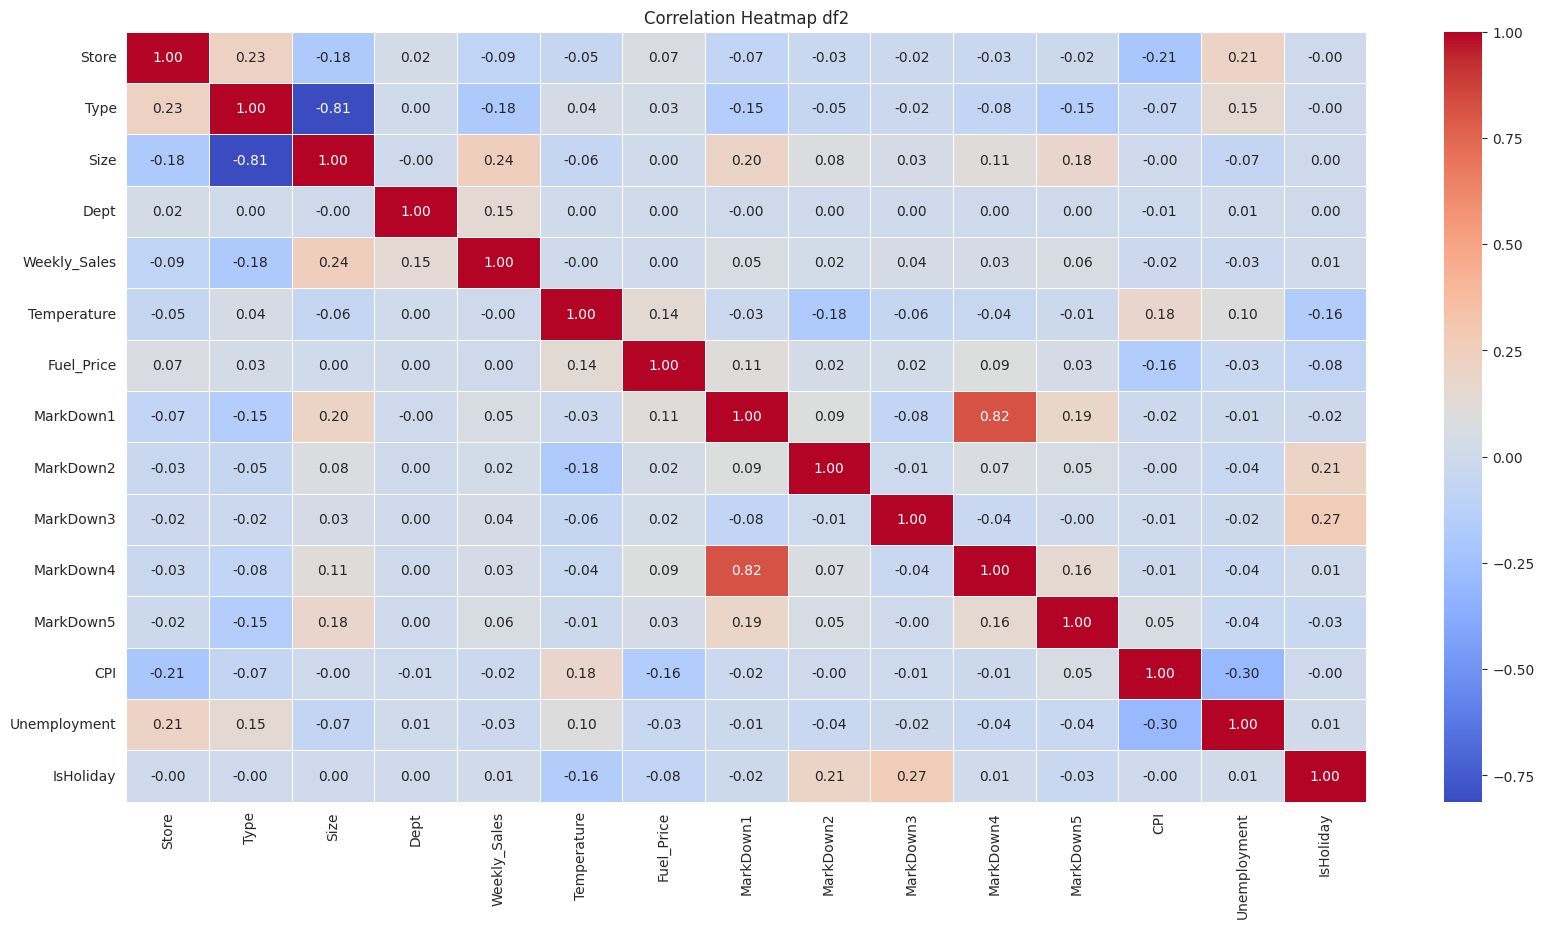

In [237]:
# Calculate the correlation matrix
df2_corr = df2.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df2_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap df2")
plt.show()

In [238]:
# No difference in corelation matrix after replacing maakdown column to median values

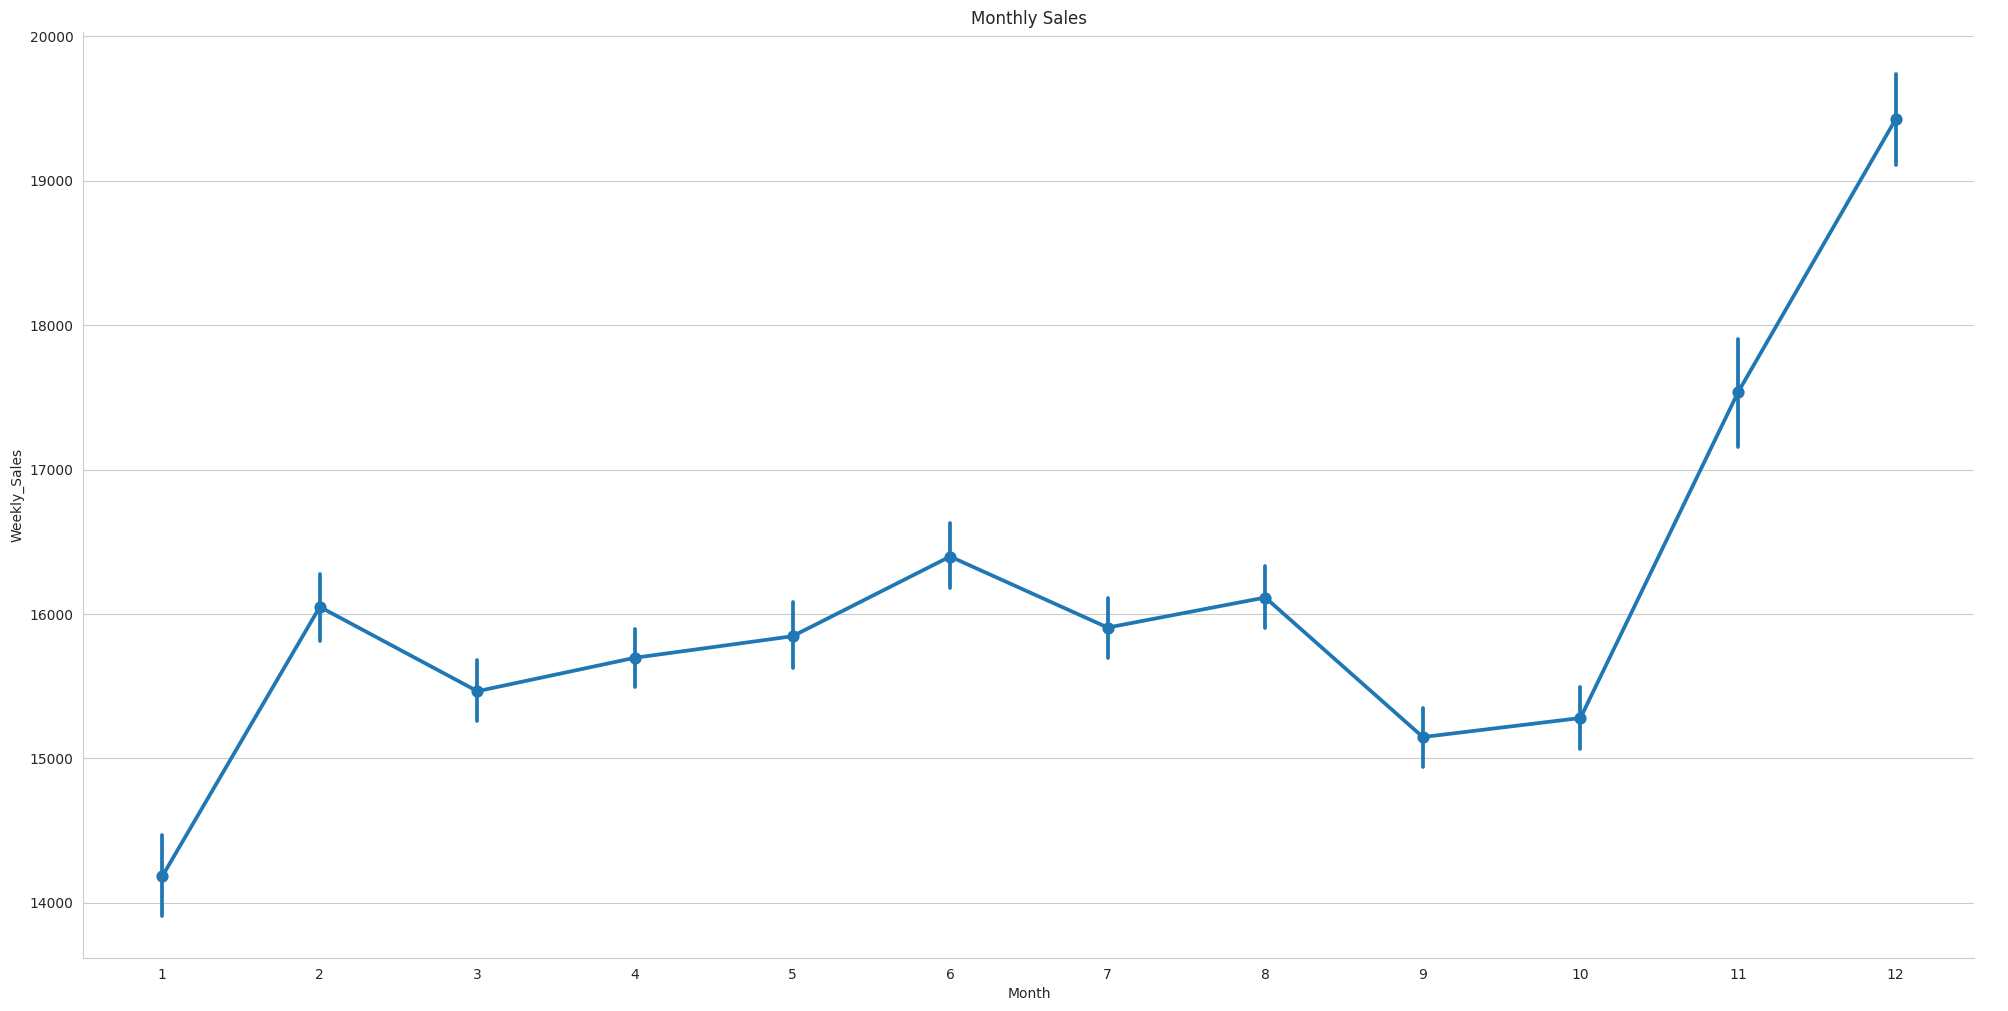

In [239]:
sns.catplot(x="Month" ,y = "Weekly_Sales" , data=df, kind="point", aspect=2,height=10)
plt.title("Monthly Sales")
plt.show()
# As We can see that In the month of November and Specially in December Sales is increasing Rapidly on the christmas eve.

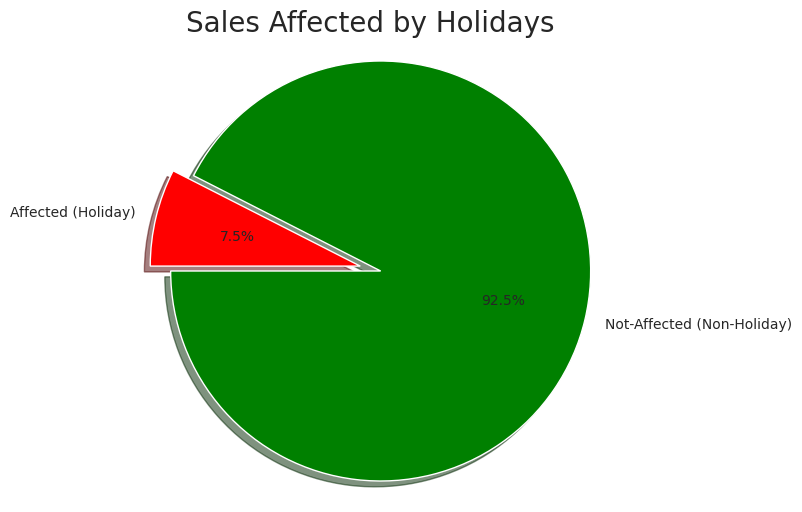

In [240]:
# Group by 'IsHoliday' and sum the 'Weekly_Sales'
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].sum()

# Prepare labels and sizes for the pie chart
labels = ['Not-Affected (Non-Holiday)', 'Affected (Holiday)']
sizes = holiday_sales.values
colors = ['g', 'r']
explode = (0.1, 0.0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Holidays", fontsize=20)
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

# As we can see in the Piechart Sales affected by Holiday is 7.5% and Mainly Sales aren't afffected by Holidays

In [241]:
df.columns.unique()

Index(['Store', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month', 'Year',
       'Markdown'],
      dtype='object')

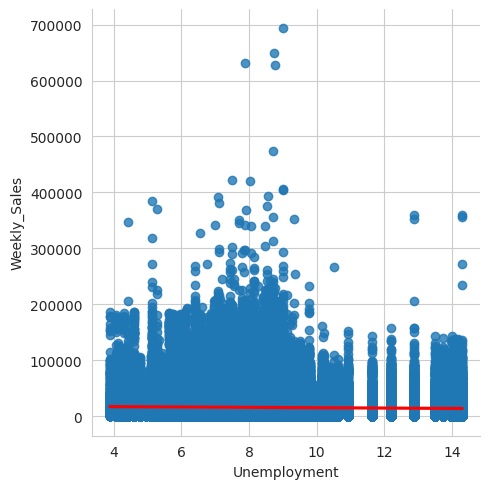

In [242]:
# Checking is there any linear relation between sales and customers
sns.lmplot(x= 'Unemployment' , y ='Weekly_Sales',data=df, palette='seismic', height=5,aspect=1, line_kws={'color':'r'})
plt.show()

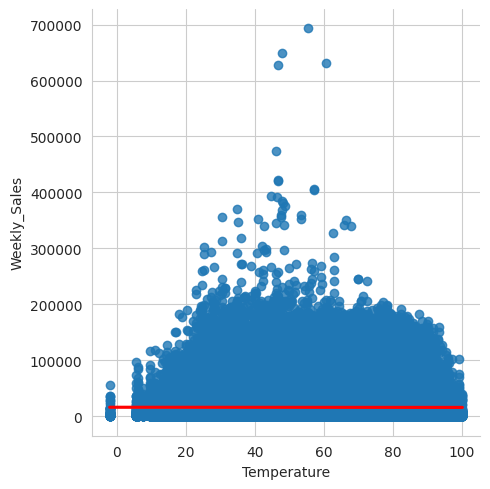

In [243]:
sns.lmplot(x= 'Temperature' , y ='Weekly_Sales',data=df, palette='seismic', height=5,aspect=1, line_kws={'color':'r'})
plt.show()

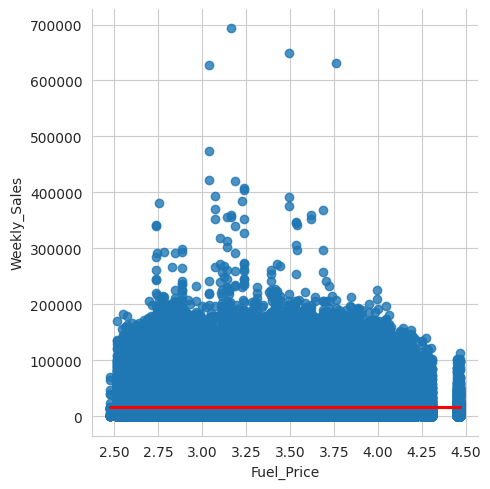

In [244]:
sns.lmplot(x= 'Fuel_Price' , y ='Weekly_Sales',data=df, palette='seismic', height=5,aspect=1, line_kws={'color':'r'})
plt.show()
# There is no linear relationship between these variable with target column

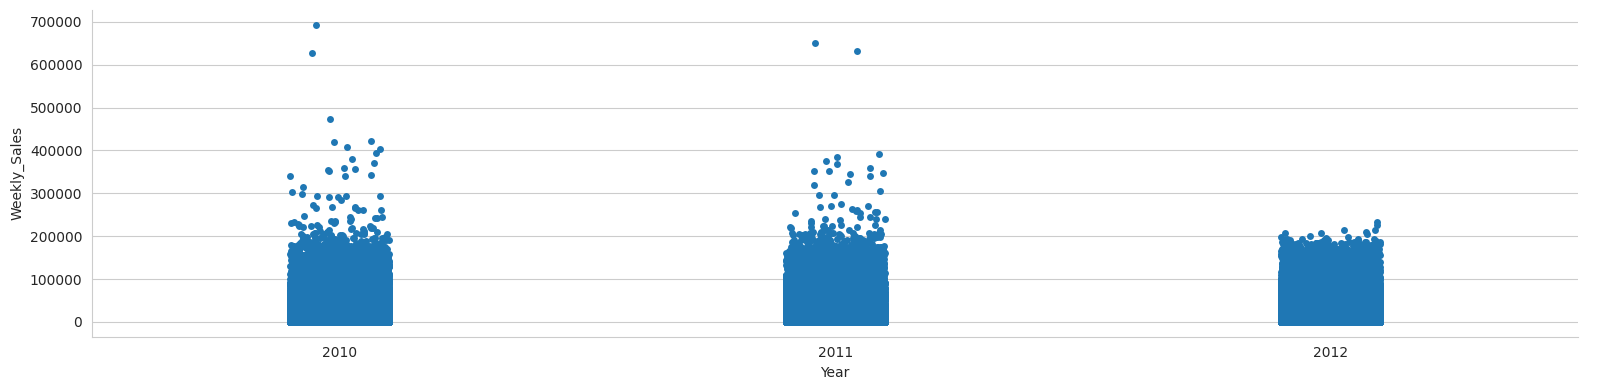

In [245]:
#plotting year vs sales
sns.catplot(x='Year',y='Weekly_Sales',data=df, height=4, aspect=4 )

In [246]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month', 'Year',
       'Markdown'],
      dtype='object')

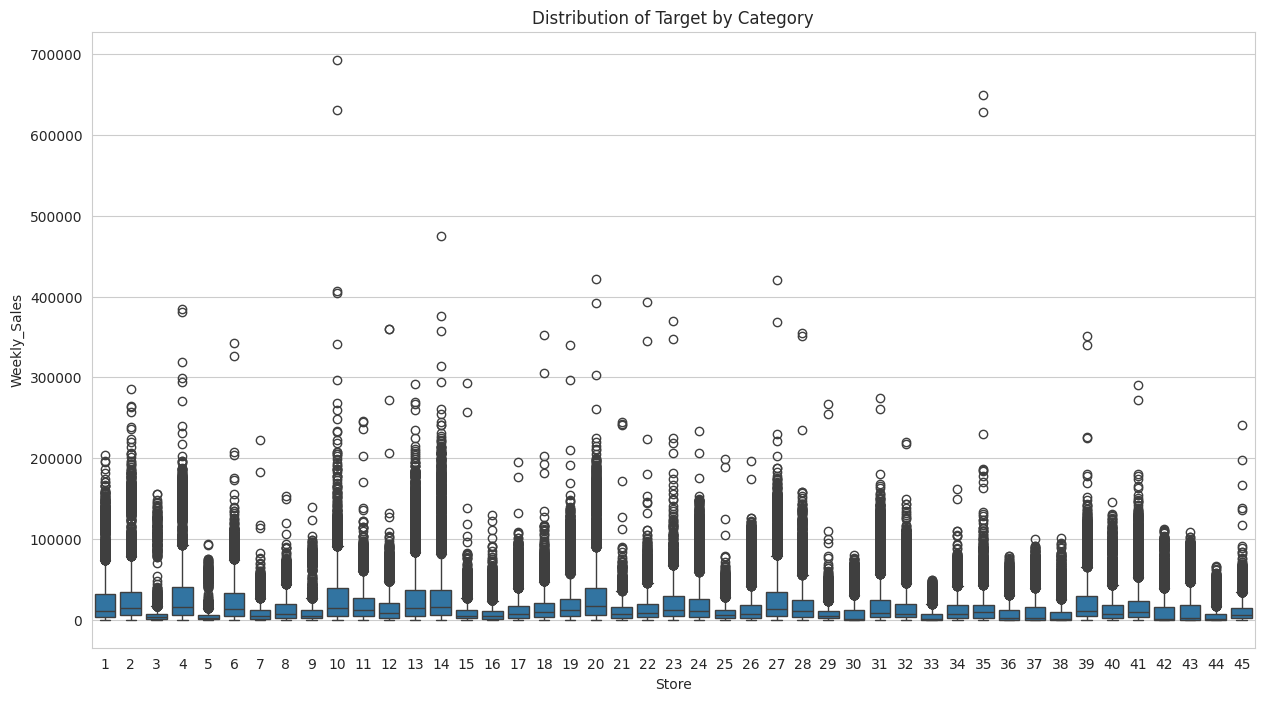

In [247]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Distribution of Target by Category')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

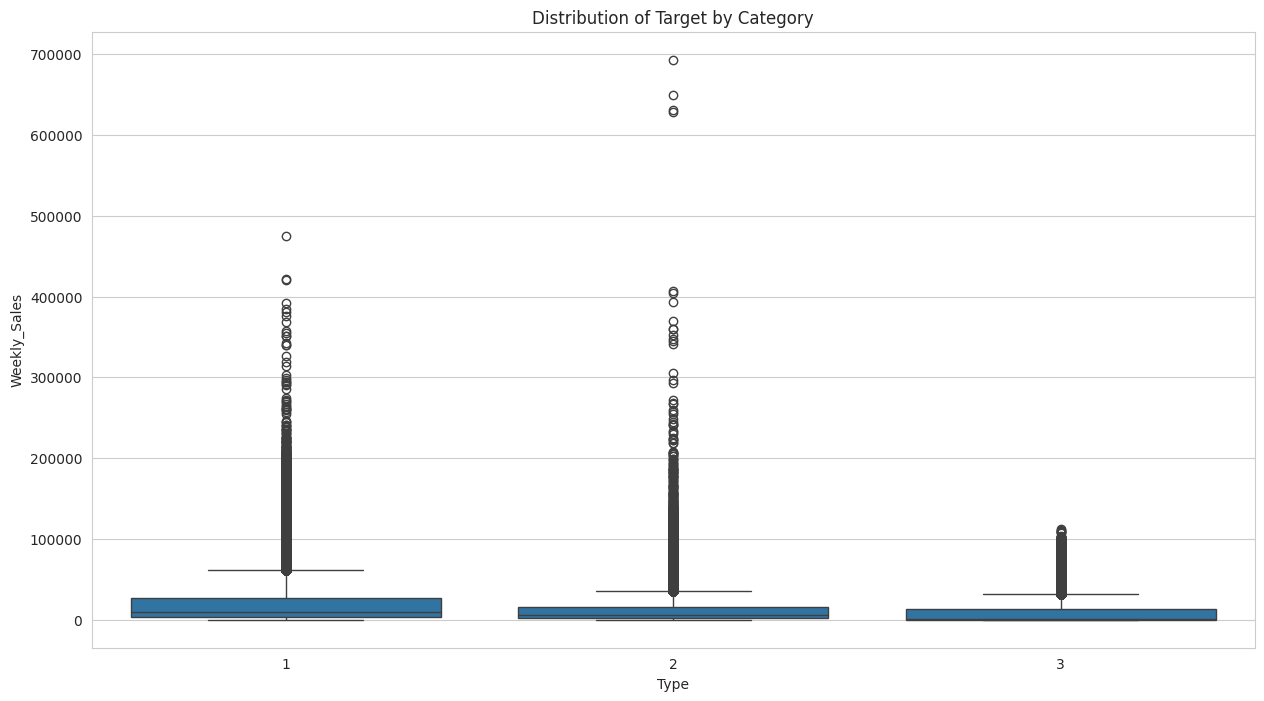

In [248]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Distribution of Target by Category')
plt.xlabel('Type')
plt.ylabel('Weekly_Sales')
plt.show()

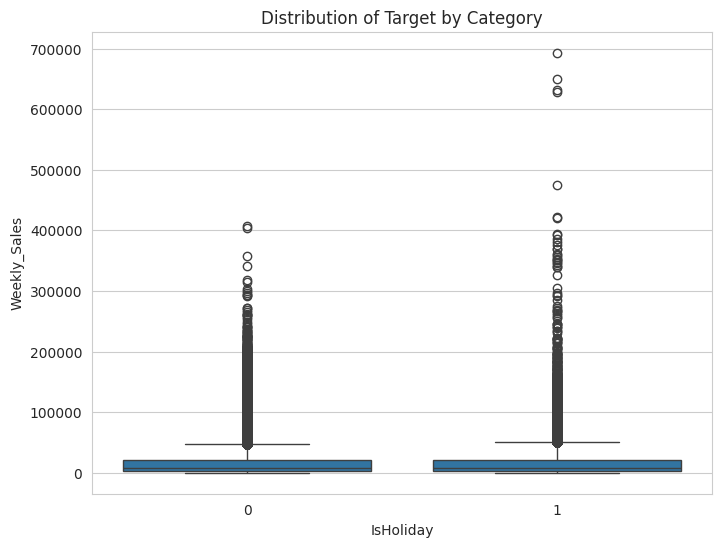

In [249]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Distribution of Target by Category')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly_Sales')
plt.show()

### Multi-variate Analysis

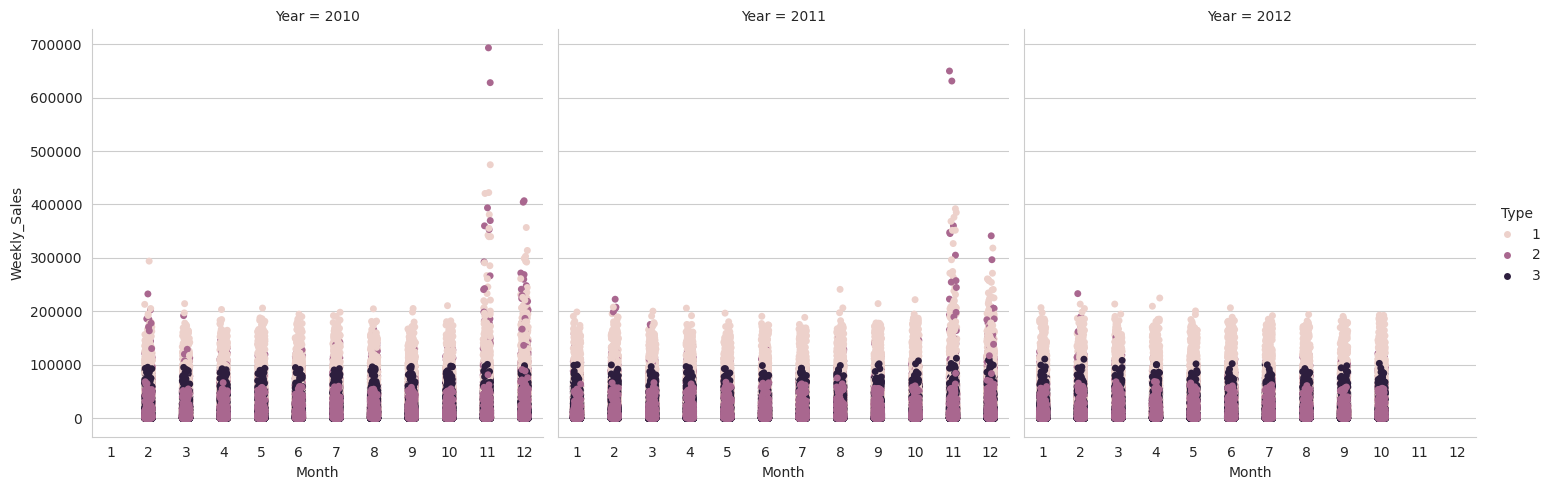

In [250]:
sns.catplot(data = df, x = "Month", y = "Weekly_Sales", col = "Year", hue = "Type")
plt.show()

# Here we can see margin of sales is higher in Type-1 store
# seems during November and December sales is higher on Type - 1 & 2 stores

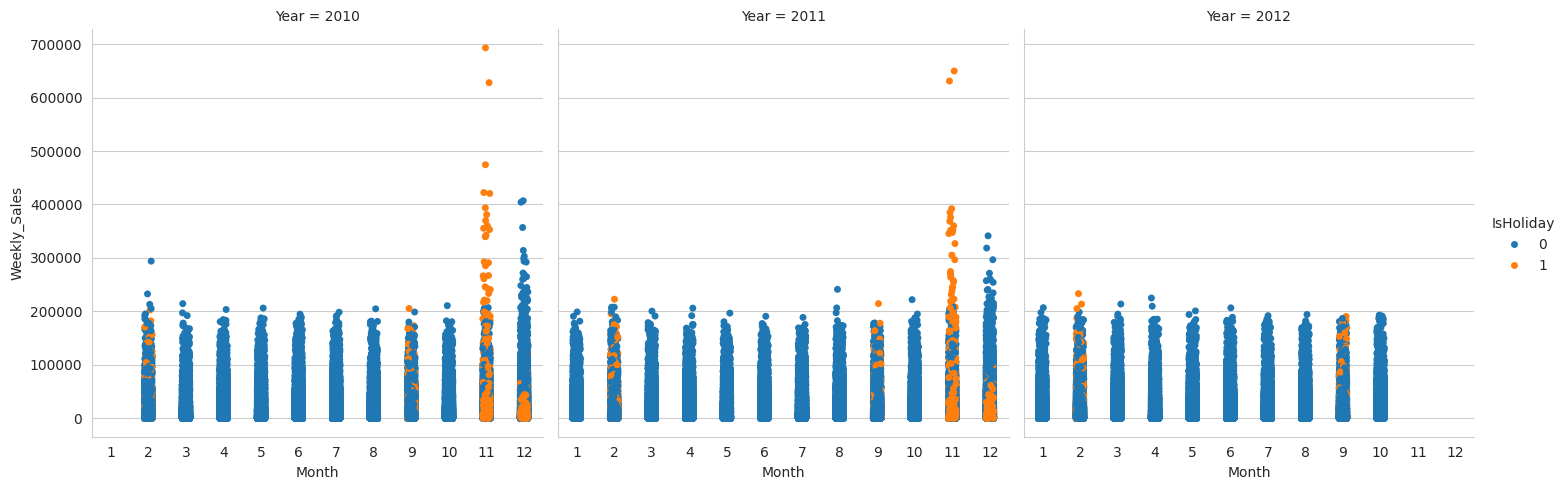

In [251]:
sns.catplot(data = df, x = "Month", y = "Weekly_Sales", col = "Year", hue = "IsHoliday")

### Implementing ML techinique in df to predict null values in Markdown columns

In [252]:
#Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns)
MarkDown = ['MarkDown1', 'MarkDown2', 'MarkDown3',  'MarkDown4', 'MarkDown5']

Columns with null values: Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')


In [253]:
# Features to use for prediction (all columns except the MarkDown columns)
features = ['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']

for target in MarkDown:
    # Split the data into training and prediction sets for the current MarkDown column
    train_df = df[df[target].notnull()]
    predict_df = df[df[target].isnull()]

    # Features and target
    X_train = train_df[features]
    y_train = train_df[target]
    X_predict = predict_df[features]

    # Initialize the model
    RF_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    RF_model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = RF_model.predict(X_predict)

    # Fill the missing values in the original DataFrame
    df.loc[df[target].isnull(), target] = predicted_values

df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Markdown
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0


In [254]:
# df.to_csv("final_df.csv", index=False)

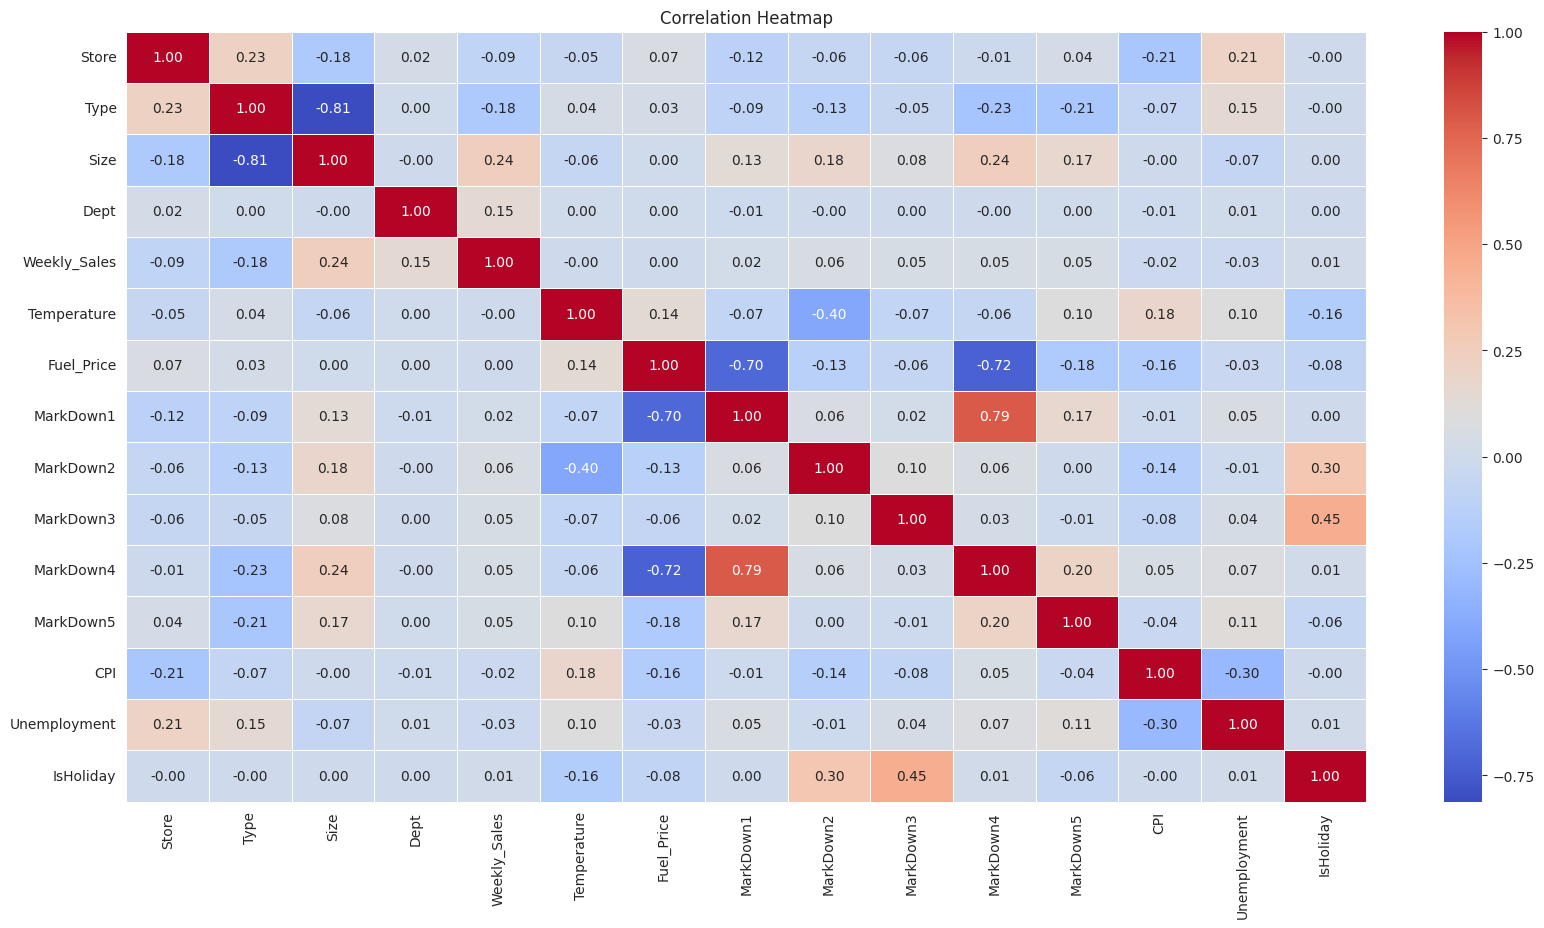

In [255]:
# Calculate the correlation matrix
df_corr = df.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Column Type, Size & Dept have higher corelation with target variable(Weekly sales), other columns have week corelation with target column

### Preparation for Modeling

In [256]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

In [257]:
numeric_columns

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [258]:
df.isnull().sum()

,0
Store,0
Type,0
Size,0
Dept,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [259]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Markdown
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0


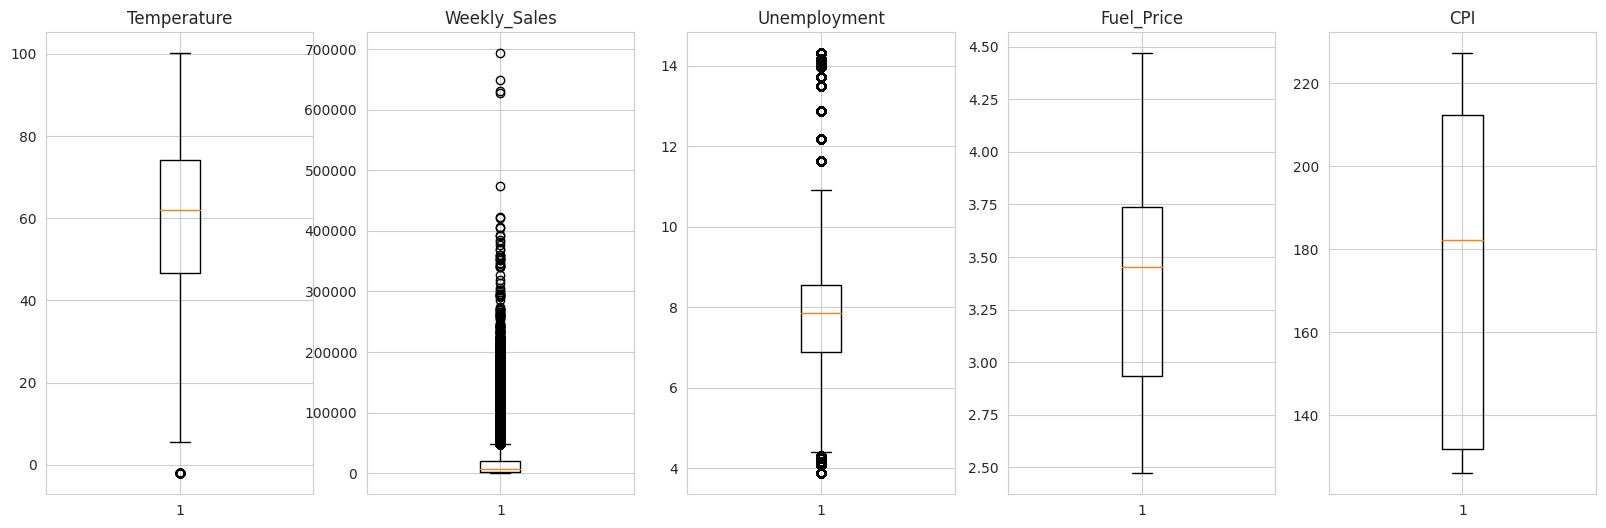

In [260]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.boxplot(df["Temperature"])
ax1.set_title("Temperature")

ax2.boxplot(df["Weekly_Sales"])
ax2.set_title("Weekly_Sales")

ax3.boxplot(df["Unemployment"])
ax3.set_title("Unemployment")

ax4.boxplot(df["Fuel_Price"])
ax4.set_title("Fuel_Price")

ax5.boxplot(df["CPI"])
ax5.set_title("CPI")

plt.show()

In [261]:
df["Weekly_Sales"].describe()

,Weekly_Sales
count,420212.000000
mean,16033.114591
std,22729.492116
min,0.010000
25%,2120.130000
50%,7661.700000
75%,20271.265000
max,693099.360000


In [263]:
def iqr(df, column_name):
    q1 = np.quantile(df[column_name], 0.25)
    q3 = np.quantile(df[column_name], 0.75)

    diff = q3 - q1
    lower_threshold  = q1 - (1.5 * diff)
    upper_threshold  = q3 + (1.5 * diff)

    print("Lower Threshold:", lower_threshold)
    print("Upper Threshold:", upper_threshold)
    # Identify rows outside the threshold range
    outliers = df[(df[column_name] < lower_threshold) | (df[column_name] > upper_threshold)]

    return len(outliers)

In [264]:
outliers_temp = iqr(df, 'Temperature')
print(f"Number of rows outside the IQR range: {outliers_temp}")

Lower Threshold: 5.279999999999994
Upper Threshold: 115.68
Number of rows outside the IQR range: 67


In [265]:
outliers_sales = iqr(df, "Weekly_Sales")
print(f"Number of rows outside the IQR range: {outliers_sales}")

Lower Threshold: -25106.5725
Upper Threshold: 47497.9675
Number of rows outside the IQR range: 35377


In [266]:
outliers_Unemp = iqr(df, "Unemployment")
print(f"Number of rows outside the IQR range: {outliers_Unemp}")

Lower Threshold: 4.377
Upper Threshold: 11.081
Number of rows outside the IQR range: 32044


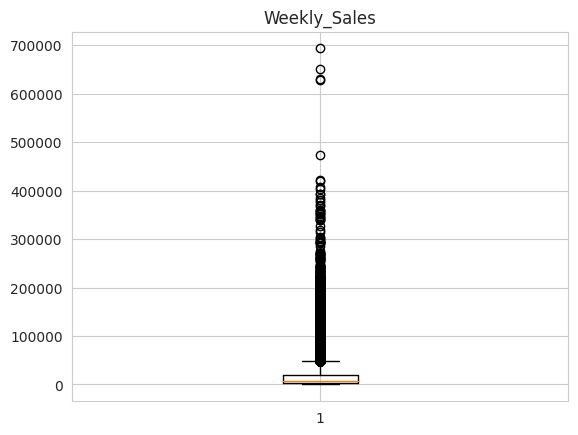

In [267]:
plt.boxplot(df["Weekly_Sales"])
plt.title("Weekly_Sales")
plt.show()

In [268]:
len(df[df["Weekly_Sales"] >= 250000])

62

In [269]:
dropped_rows = df[df["Weekly_Sales"] >= 250000].index
df.drop(dropped_rows, inplace=True)

In [270]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Markdown
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,5,2,2010,0


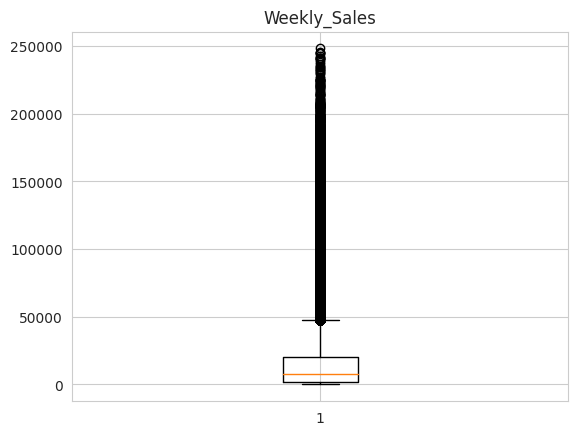

In [271]:
plt.boxplot(df["Weekly_Sales"])
plt.title("Weekly_Sales")
plt.show()

In [272]:
outliers_Unemp = iqr(df, "Unemployment")
print(f"Number of rows outside the IQR range: {outliers_Unemp}")

Lower Threshold: 4.377
Upper Threshold: 11.081
Number of rows outside the IQR range: 32039


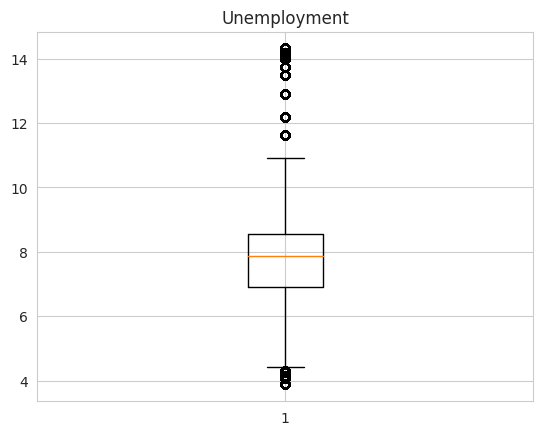

In [273]:
plt.boxplot(df["Unemployment"])
plt.title("Unemployment")
plt.show()

In [274]:
df[df["Unemployment"] >= 11].Unemployment.max()

14.313

In [275]:
df[df["Unemployment"] <= 11].Unemployment.min()

3.879

In [276]:
len(df[df["Unemployment"] >= 11])

23856

In [277]:
len(df[df["Unemployment"] <= 5])

15013

### Determining Distributions of Numeric Variables

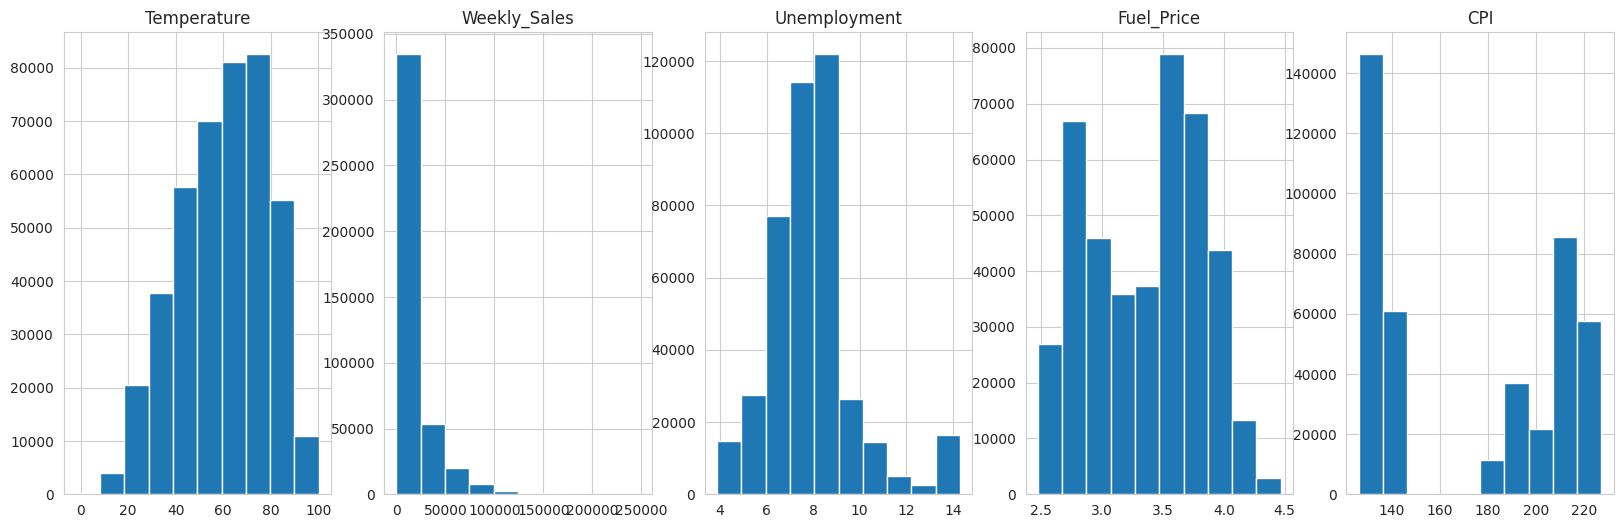

In [278]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.hist(df["Temperature"])
ax1.set_title("Temperature")

ax2.hist(df["Weekly_Sales"])
ax2.set_title("Weekly_Sales")

ax3.hist(df["Unemployment"])
ax3.set_title("Unemployment")

ax4.hist(df["Fuel_Price"])
ax4.set_title("Fuel_Price")

ax5.hist(df["CPI"])
ax5.set_title("CPI")

plt.show()

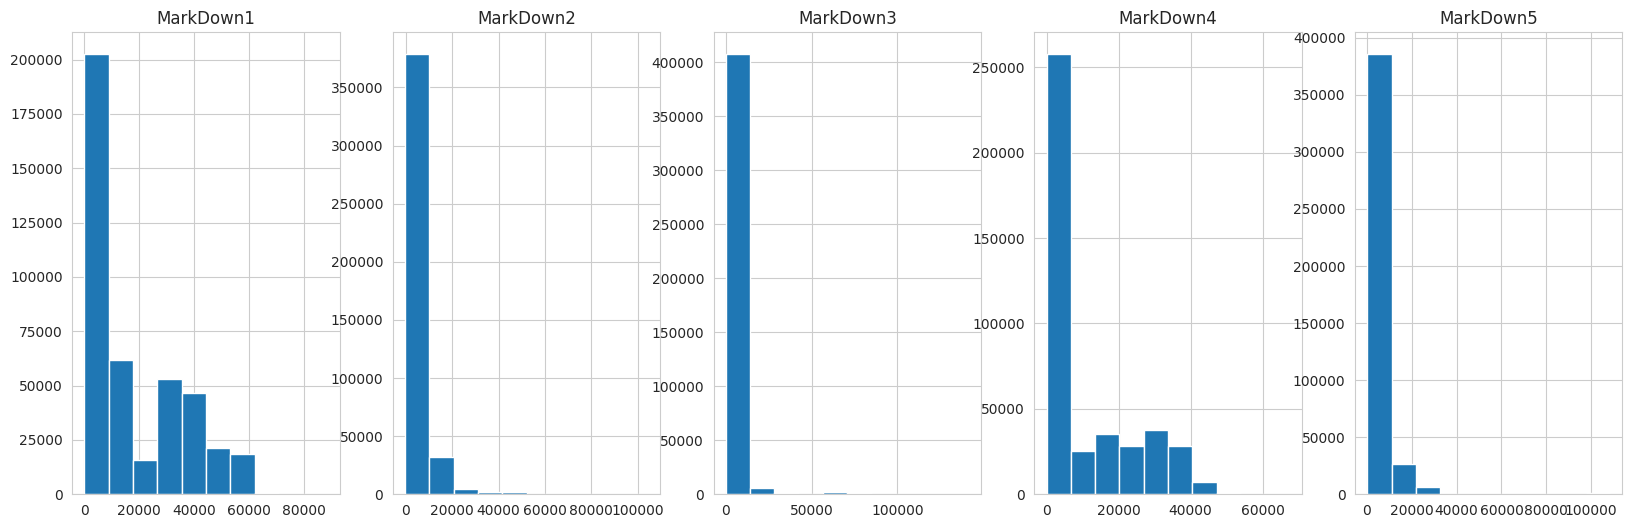

In [279]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.hist(df["MarkDown1"])
ax1.set_title("MarkDown1")

ax2.hist(df["MarkDown2"])
ax2.set_title("MarkDown2")

ax3.hist(df["MarkDown3"])
ax3.set_title("MarkDown3")

ax4.hist(df["MarkDown4"])
ax4.set_title("MarkDown4")

ax5.hist(df["MarkDown5"])
ax5.set_title("MarkDown5")

plt.show()

In [280]:
# Skew in Numerical columns

df[['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']].agg(["skew"]).transpose()

,skew
Weekly_Sales,2.833530
Temperature,-0.321494
Fuel_Price,-0.104773
MarkDown1,0.806067
MarkDown2,5.864418
MarkDown3,8.758661
MarkDown4,1.100434
MarkDown5,7.951409
CPI,0.084591
Unemployment,1.183749


In [281]:
df["Weekly_Sales_log"] = np.log(df["Weekly_Sales"])
df["Weekly_Sales_sqrt"] = np.sqrt(df["Weekly_Sales"])

In [282]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Markdown,Weekly_Sales_log,Weekly_Sales_sqrt
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,5,2,2010,0,10.123607,157.874951
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,5,2,2010,0,10.831811,224.956151
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,5,2,2010,0,9.528075,117.218258
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,5,2,2010,0,10.595485,199.885067
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,5,2,2010,0,10.380634,179.525430


In [283]:
df[["Weekly_Sales", "Weekly_Sales_log", "Weekly_Sales_sqrt"]].agg(["skew"]).transpose()

,skew
Weekly_Sales,2.833530
Weekly_Sales_log,-1.307200
Weekly_Sales_sqrt,1.031556


In [284]:
df.drop(columns=["Weekly_Sales", "Weekly_Sales_log"], inplace=True)

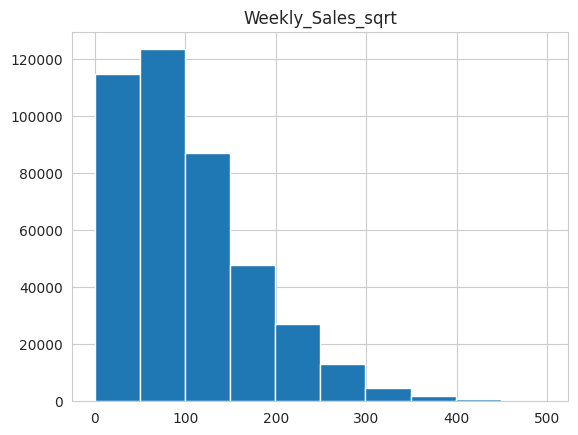

In [285]:
plt.hist(df["Weekly_Sales_sqrt"])
plt.title("Weekly_Sales_sqrt")
plt.show()

In [286]:
df["MarkDown2_log"] = np.log(df["MarkDown2"])
df["MarkDown2_sqrt"] = np.sqrt(df["MarkDown2"])

df["MarkDown3_log"] = np.log(df["MarkDown3"])
df["MarkDown3_sqrt"] = np.sqrt(df["MarkDown3"])

df["MarkDown4_log"] = np.log(df["MarkDown4"])
df["MarkDown4_sqrt"] = np.sqrt(df["MarkDown4"])

df["MarkDown5_log"] = np.log(df["MarkDown5"])
df["MarkDown5_sqrt"] = np.sqrt(df["MarkDown5"])

df["Unemployment_log"] = np.log(df["Unemployment"])
df["Unemployment_sqrt"] = np.sqrt(df["Unemployment"])

In [287]:
df.head()

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,MarkDown2_log,MarkDown2_sqrt,MarkDown3_log,MarkDown3_sqrt,MarkDown4_log,MarkDown4_sqrt,MarkDown5_log,MarkDown5_sqrt,Unemployment_log,Unemployment_sqrt
0,1,1,151315.0,1.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
1,1,1,151315.0,2.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
2,1,1,151315.0,3.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
3,1,1,151315.0,4.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
4,1,1,151315.0,5.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104


In [288]:
df[["MarkDown2", "MarkDown2_log", "MarkDown2_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown2,5.864418
MarkDown2_log,NaN
MarkDown2_sqrt,1.966246


In [289]:
df[["MarkDown3", "MarkDown3_log", "MarkDown3_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown3,8.758661
MarkDown3_log,NaN
MarkDown3_sqrt,5.530663


In [290]:
df[["MarkDown4", "MarkDown4_log", "MarkDown4_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown4,1.100434
MarkDown4_log,-0.869155
MarkDown4_sqrt,0.550825


In [291]:
df[["MarkDown5", "MarkDown5_log", "MarkDown5_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown5,7.951409
MarkDown5_log,-0.246129
MarkDown5_sqrt,2.303763


In [292]:
df[["Unemployment", "Unemployment_log", "Unemployment_sqrt"]].agg(["skew"]).transpose()

,skew
Unemployment,1.183749
Unemployment_log,0.071939
Unemployment_sqrt,0.635108


In [293]:
# Dropping unwanted columns
df.drop(columns=["MarkDown2", "MarkDown2_log","MarkDown3", "MarkDown3_log","MarkDown4","MarkDown4_log","MarkDown5", "MarkDown5_sqrt","Unemployment","Unemployment_sqrt"], inplace=True)

In [294]:
df.head()

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,CPI,IsHoliday,Day,Month,Year,Markdown,Weekly_Sales_sqrt,MarkDown2_sqrt,MarkDown3_sqrt,MarkDown4_sqrt,MarkDown5_log,Unemployment_log
0,1,1,151315.0,1.0,42.31,2.572,39120.6279,211.096358,0,5,2,2010,0,157.874951,51.395437,19.78253,190.134739,9.408435,2.092605
1,1,1,151315.0,2.0,42.31,2.572,39120.6279,211.096358,0,5,2,2010,0,224.956151,51.395437,19.78253,190.134739,9.408435,2.092605
2,1,1,151315.0,3.0,42.31,2.572,39120.6279,211.096358,0,5,2,2010,0,117.218258,51.395437,19.78253,190.134739,9.408435,2.092605
3,1,1,151315.0,4.0,42.31,2.572,39120.6279,211.096358,0,5,2,2010,0,199.885067,51.395437,19.78253,190.134739,9.408435,2.092605
4,1,1,151315.0,5.0,42.31,2.572,39120.6279,211.096358,0,5,2,2010,0,179.525430,51.395437,19.78253,190.134739,9.408435,2.092605


### Renaming and rearranging columns

In [295]:
df.rename(columns={"Weekly_Sales_sqrt": "Weekly_Sales","MarkDown2_sqrt": "MarkDown2","MarkDown3_sqrt": "MarkDown3","MarkDown4_sqrt": "MarkDown4","MarkDown5_log": "MarkDown5","Unemployment_log": "Unemployment"}, inplace=True)

In [296]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'CPI', 'IsHoliday', 'Day', 'Month', 'Year', 'Markdown',
       'Weekly_Sales', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'Unemployment'],
      dtype='object')

In [297]:
df = df[['Day','Month','Year','Store','Dept','Type','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment','Weekly_Sales']]
df.tail()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
421565,26,10,2012,45,93.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,49.877851
421566,26,10,2012,45,94.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,72.133973
421567,26,10,2012,45,95.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,236.680101
421568,26,10,2012,45,97.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,82.568033
421569,26,10,2012,45,98.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,32.814631


In [298]:
# Once again checking the skewness
df[['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']].agg(["skew"]).transpose()

,skew
Weekly_Sales,1.031556
Temperature,-0.321494
Fuel_Price,-0.104773
MarkDown1,0.806067
MarkDown2,1.966246
MarkDown3,5.530663
MarkDown4,0.550825
MarkDown5,-0.246129
CPI,0.084591
Unemployment,0.071939


In [299]:
df.isnull().sum()

,0
Day,0
Month,0
Year,0
Store,0
Dept,0
Type,0
Size,0
IsHoliday,0
Temperature,0
Fuel_Price,0


In [300]:
# replacing null values with median
df.MarkDown2.fillna(df2.MarkDown2.median(), inplace=True)
df.MarkDown3.fillna(df2.MarkDown3.median(), inplace=True)

In [301]:
df.isnull().sum()

,0
Day,0
Month,0
Year,0
Store,0
Dept,0
Type,0
Size,0
IsHoliday,0
Temperature,0
Fuel_Price,0


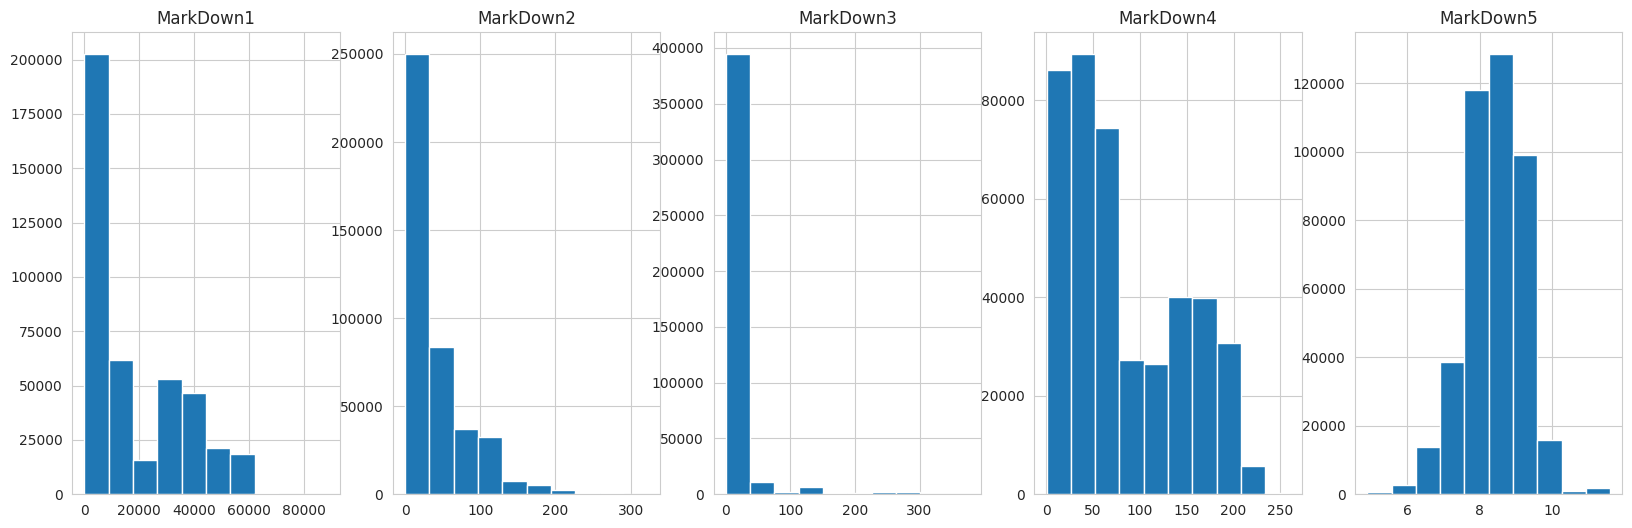

In [302]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.hist(df["MarkDown1"])
ax1.set_title("MarkDown1")

ax2.hist(df["MarkDown2"])
ax2.set_title("MarkDown2")

ax3.hist(df["MarkDown3"])
ax3.set_title("MarkDown3")

ax4.hist(df["MarkDown4"])
ax4.set_title("MarkDown4")

ax5.hist(df["MarkDown5"])
ax5.set_title("MarkDown5")

plt.show()

In [303]:
df.head()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,5,2,2010,1,1.0,1,151315.0,0,42.31,2.572,39120.6279,51.395437,19.78253,190.134739,9.408435,211.096358,2.092605,157.874951
1,5,2,2010,1,2.0,1,151315.0,0,42.31,2.572,39120.6279,51.395437,19.78253,190.134739,9.408435,211.096358,2.092605,224.956151
2,5,2,2010,1,3.0,1,151315.0,0,42.31,2.572,39120.6279,51.395437,19.78253,190.134739,9.408435,211.096358,2.092605,117.218258
3,5,2,2010,1,4.0,1,151315.0,0,42.31,2.572,39120.6279,51.395437,19.78253,190.134739,9.408435,211.096358,2.092605,199.885067
4,5,2,2010,1,5.0,1,151315.0,0,42.31,2.572,39120.6279,51.395437,19.78253,190.134739,9.408435,211.096358,2.092605,179.525430


### Scaling with the StandardScaler Method for Machine Learning Algorithms

In [305]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [306]:
scaled_df

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,-1.219345,-1.371894,-1.215359,-1.657605,-1.417264,-0.884620,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.243150,0.026620,1.681679,1.260649,1.018367,0.194551,0.747976
1,-1.219345,-1.371894,-1.215359,-1.657605,-1.384487,-0.884620,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.243150,0.026620,1.681679,1.260649,1.018367,0.194551,1.648668
2,-1.219345,-1.371894,-1.215359,-1.657605,-1.351710,-0.884620,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.243150,0.026620,1.681679,1.260649,1.018367,0.194551,0.202083
3,-1.219345,-1.371894,-1.215359,-1.657605,-1.318932,-0.884620,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.243150,0.026620,1.681679,1.260649,1.018367,0.194551,1.312042
4,-1.219345,-1.371894,-1.215359,-1.657605,-1.286155,-0.884620,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.243150,0.026620,1.681679,1.260649,1.018367,0.194551,1.038675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420145,1.179903,1.094894,1.294339,1.783292,1.598263,0.615925,-0.303696,-0.2749,-0.067363,1.136413,-0.805025,-0.785647,-0.244684,-1.102280,-2.082568,0.538637,0.491946,-0.702089
420146,1.179903,1.094894,1.294339,1.783292,1.631041,0.615925,-0.303696,-0.2749,-0.067363,1.136413,-0.805025,-0.785647,-0.244684,-1.102280,-2.082568,0.538637,0.491946,-0.403259
420147,1.179903,1.094894,1.294339,1.783292,1.663818,0.615925,-0.303696,-0.2749,-0.067363,1.136413,-0.805025,-0.785647,-0.244684,-1.102280,-2.082568,0.538637,0.491946,1.806084
420148,1.179903,1.094894,1.294339,1.783292,1.729373,0.615925,-0.303696,-0.2749,-0.067363,1.136413,-0.805025,-0.785647,-0.244684,-1.102280,-2.082568,0.538637,0.491946,-0.263162


In [307]:
# scaled_df.to_csv("scaled_df.csv", index=False)